# From Gate to Great: Predicting and Preventing Flight Delays with Data ✈️


![IMG PPD](IMG%20PPD.png)


## ✈️ Project Objective
The objective of this project is to analyze historical flight data across major U.S. airlines to uncover patterns in flight delays, identify high-risk routes and times, assess the punctuality of different airlines and airports, and build predictive insights to forecast delays. The ultimate goal is to enhance operational efficiency, improve passenger satisfaction, and support data-driven decision-making in the aviation industry.



## 📊 Executive Summary
This project provides a comprehensive analysis of flight delays in the United States using historical data from various airlines, airports, and flight schedules. Through interactive Power BI dashboards, the study reveals that certain carriers like Delta and Alaska outperform others such as Frontier and Spirit in terms of on-time performance. Seasonal trends show significant delays during winter (January and December) and summer peaks (July), while evening flights are more prone to disruptions due to operational backlogs.

Analysis of airport performance highlights that major hubs like Chicago O’Hare (ORD) and Newark (EWR) consistently experience longer delays, largely due to traffic congestion and regional weather challenges. In contrast, airports like Salt Lake City (SLC) and Phoenix (PHX) demonstrate higher operational efficiency.

The project also explores predictive modeling to classify whether a flight will be delayed by 15 minutes or more. Key influencing factors identified include airline carrier, departure time, airport congestion, and flight distance. These insights not only inform passengers and airlines but also assist in optimizing flight schedules, resource allocation, and airport operations.

Overall, the project delivers actionable insights to support better planning, reduce delays, and enhance the travel experience for passengers and stakeholders alike.



## 💾 The data


**flights.csv**
- `id` - Id number of the flight
- `year` - Year of Flight
- `month` - Month of Flight
- `day` - Day of Month
- `dep_time` - Time of departure (24h format)
- `sched_dep_time` - Scheduled departure time
- `dep_delay` - Delay in departure (minutes)
- `arr_time` - Time of arrival (24h format)
- `sched_arr_time` - Scheduled arrival time
- `arr_delay` - Delay in arrival (minutes)
- `carrier` - Airline company code  
- `flight` - Flight number 
- `tailnum`- Aircraft identifier number
- `origin` - Origin Airport - 3 letter code
- `dest` - Destination Airport - 3 letter code
- `air_time` - Duration of the flight (minutes)
- `distance` - Flight distance (miles)
- `hour` - Hour component of scheduled departure time
- `minute` - Minute component of scheduled departure time

**airlines_carrier_codes.csv**
- `Carrier Code` - Airline company code 
- `Airline Name` - Airline Name 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Load datasets
flights = pd.read_csv("data/flights.csv")
airlines = pd.read_csv("data/airlines_carrier_codes.csv")

# Merge airline names
flights = flights.merge(airlines, how='left', left_on='carrier', right_on='Carrier Code')

In [2]:
print(flights.shape)
print(flights.info())

# Sample data
flights.head()

(336776, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              336776 non-null  int64  
 1   year            336776 non-null  int64  
 2   month           336776 non-null  int64  
 3   day             336776 non-null  int64  
 4   dep_time        328521 non-null  float64
 5   sched_dep_time  336776 non-null  int64  
 6   dep_delay       328521 non-null  float64
 7   arr_time        328063 non-null  float64
 8   sched_arr_time  336776 non-null  int64  
 9   arr_delay       327346 non-null  float64
 10  carrier         336776 non-null  object 
 11  flight          336776 non-null  int64  
 12  tailnum         334264 non-null  object 
 13  origin          336776 non-null  object 
 14  dest            336776 non-null  object 
 15  air_time        327346 non-null  float64
 16  distance        336776 non-null  int64  
 1

id  year  month  day  ...  hour  minute  Carrier Code            Airline Name
0   0  2023      1    1  ...     5      15            UA    United Airlines Inc.
1   1  2023      1    1  ...     5      29            UA    United Airlines Inc.
2   2  2023      1    1  ...     5      40            AA  American Airlines Inc.
3   3  2023      1    1  ...     5      45            B6         JetBlue Airways
4   4  2023      1    1  ...     6       0            DL    Delta Air Lines Inc.

[5 rows x 21 columns]

In [3]:
flights.isnull().sum().sort_values(ascending=False)

arr_delay         9430
air_time          9430
arr_time          8713
dep_time          8255
dep_delay         8255
tailnum           2512
id                   0
origin               0
Carrier Code         0
minute               0
hour                 0
distance             0
dest                 0
carrier              0
flight               0
year                 0
sched_arr_time       0
sched_dep_time       0
day                  0
month                0
Airline Name         0
dtype: int64

###   Univariate Analysis

**1. Numerical Features**

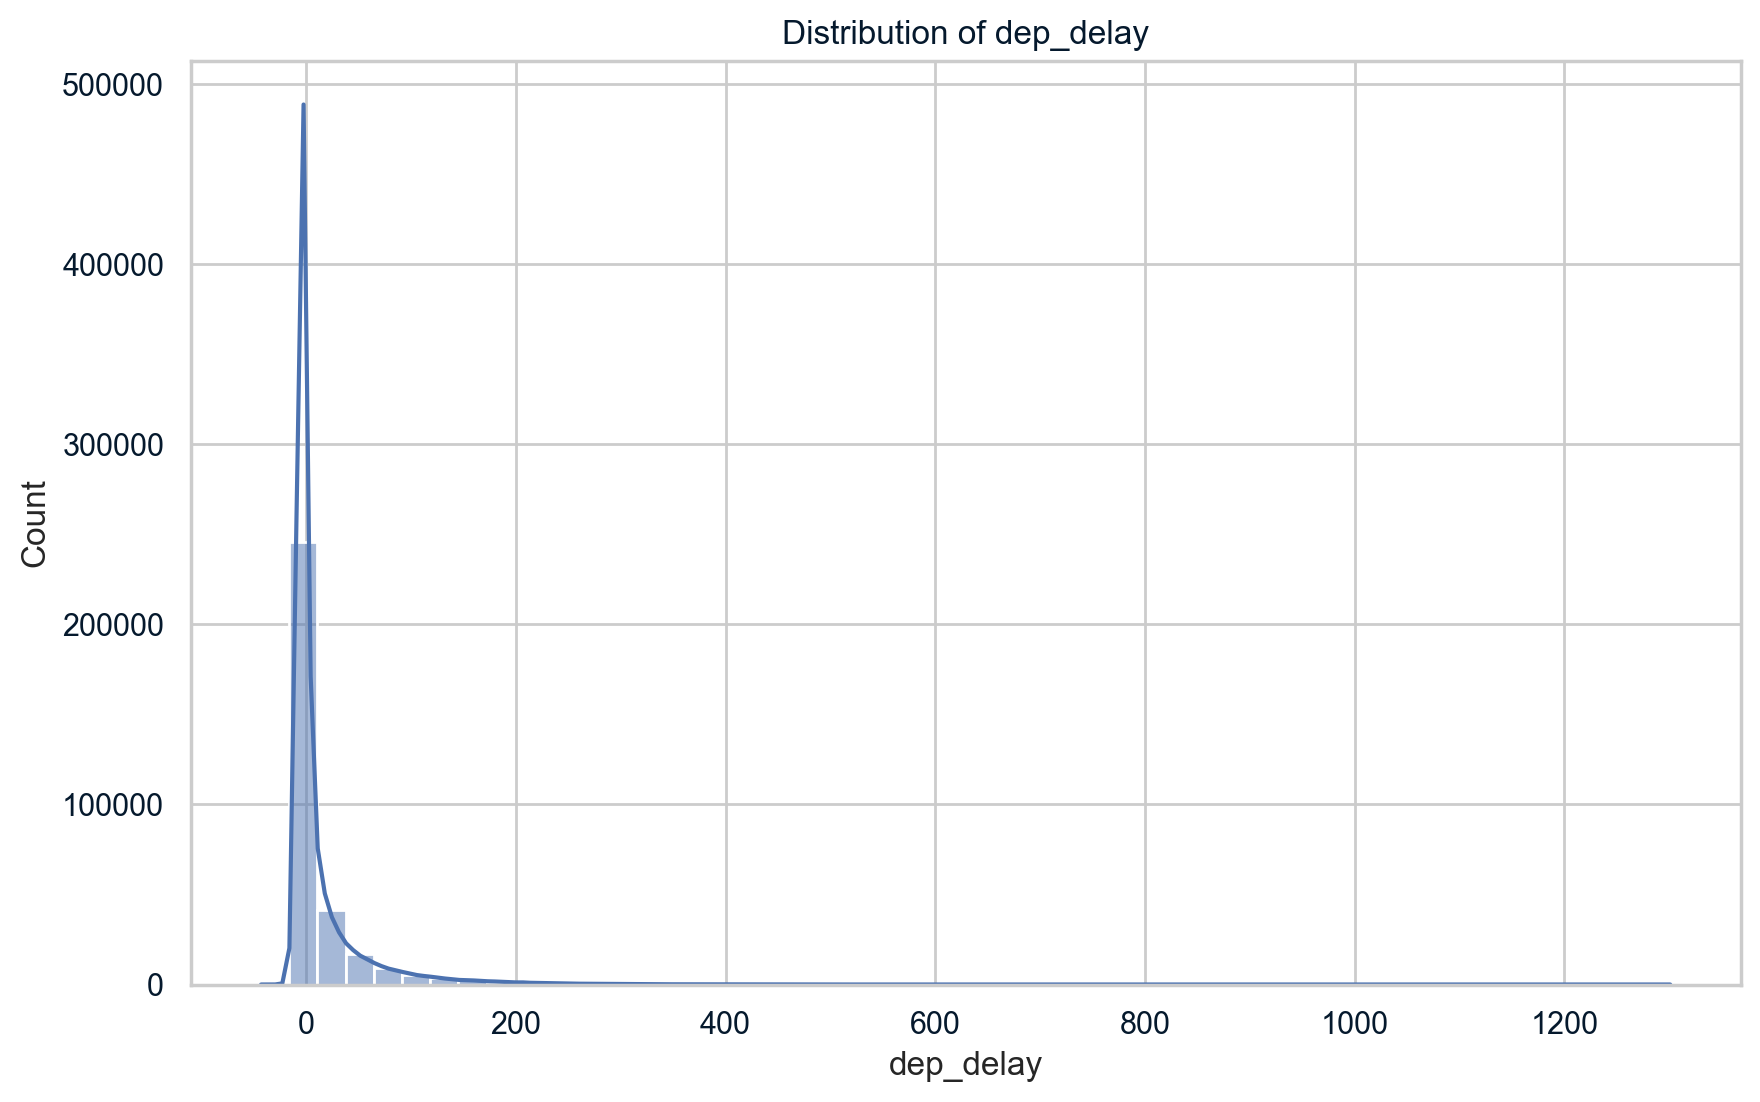

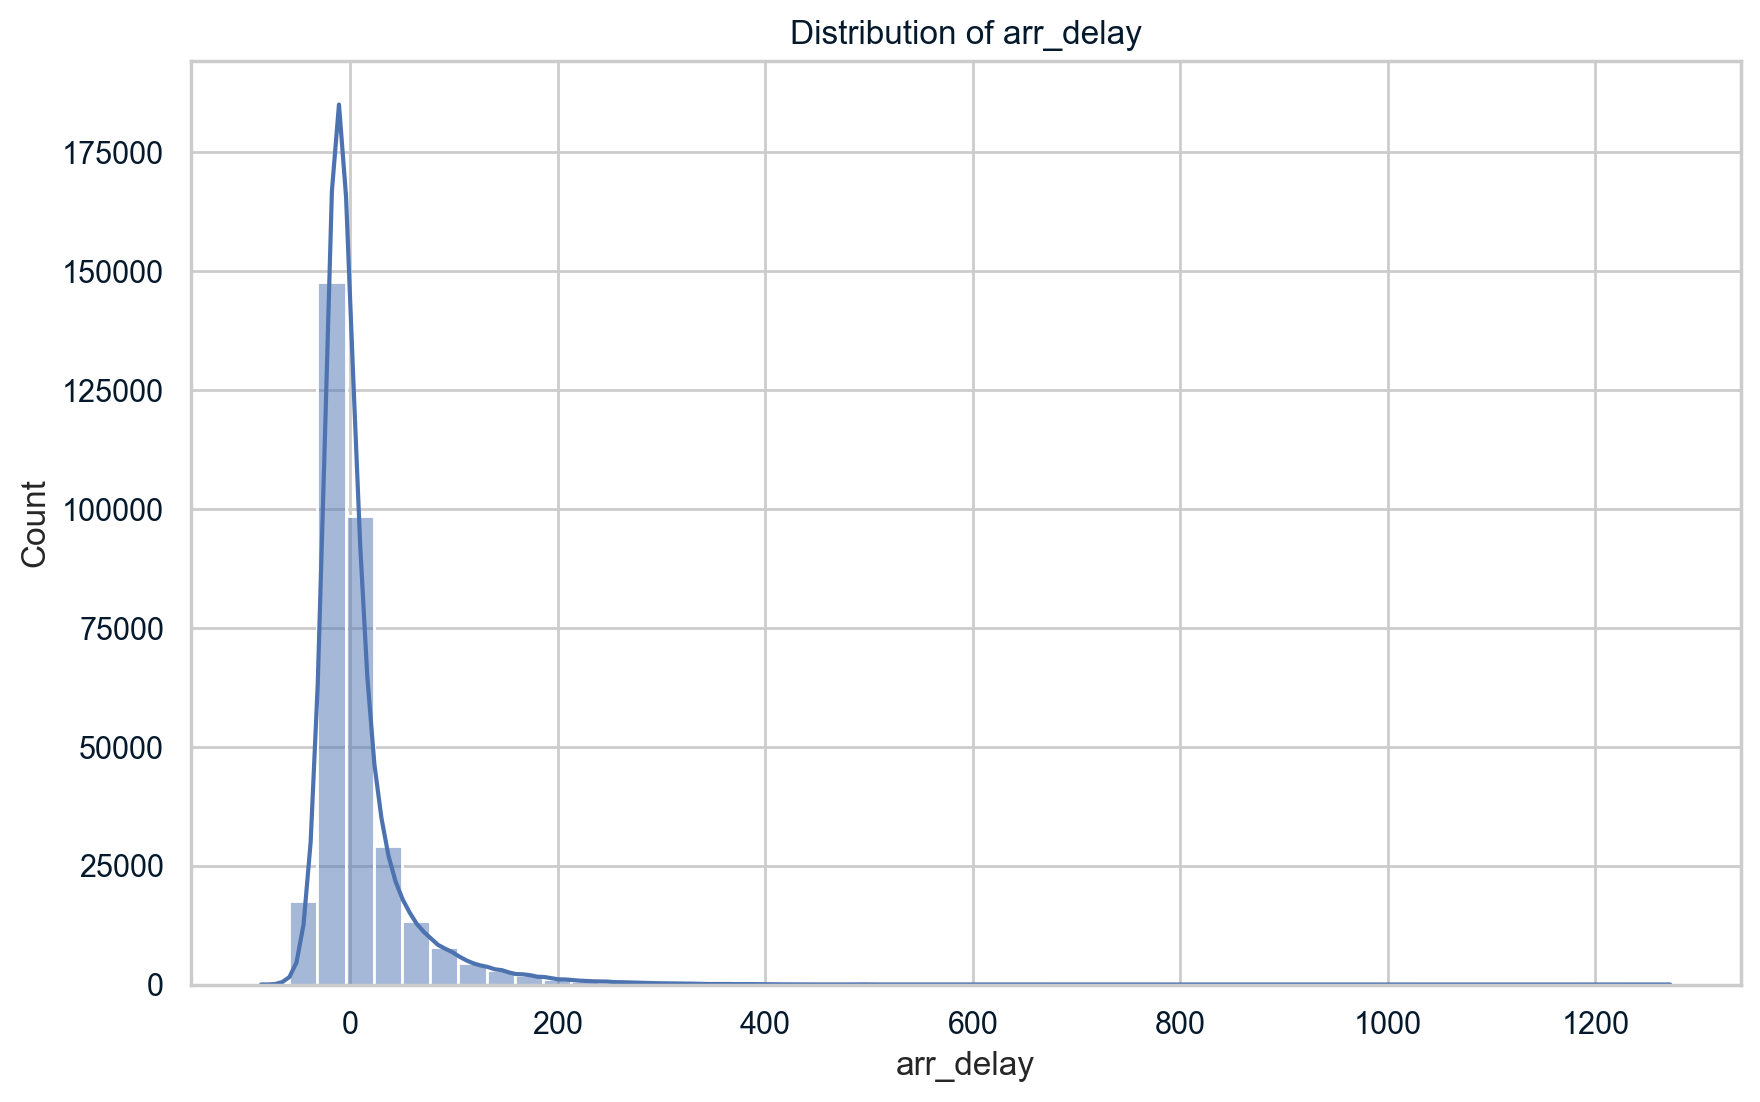

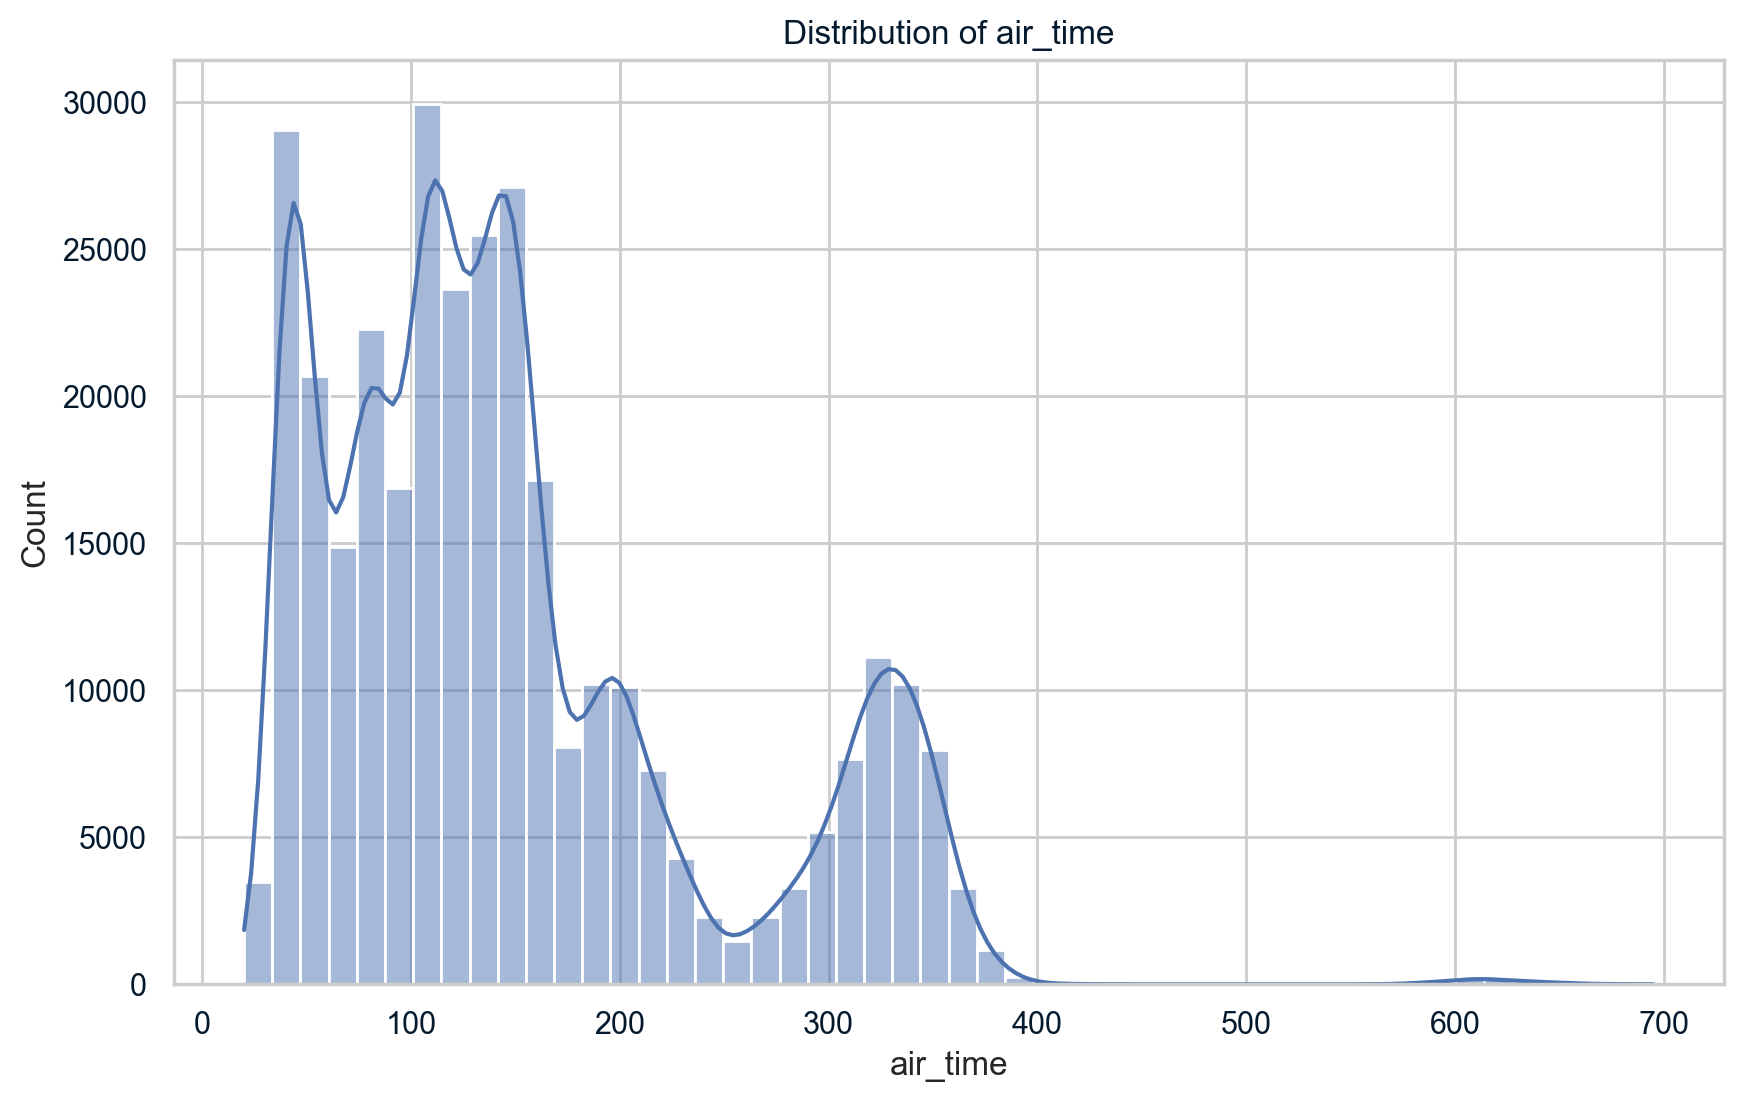

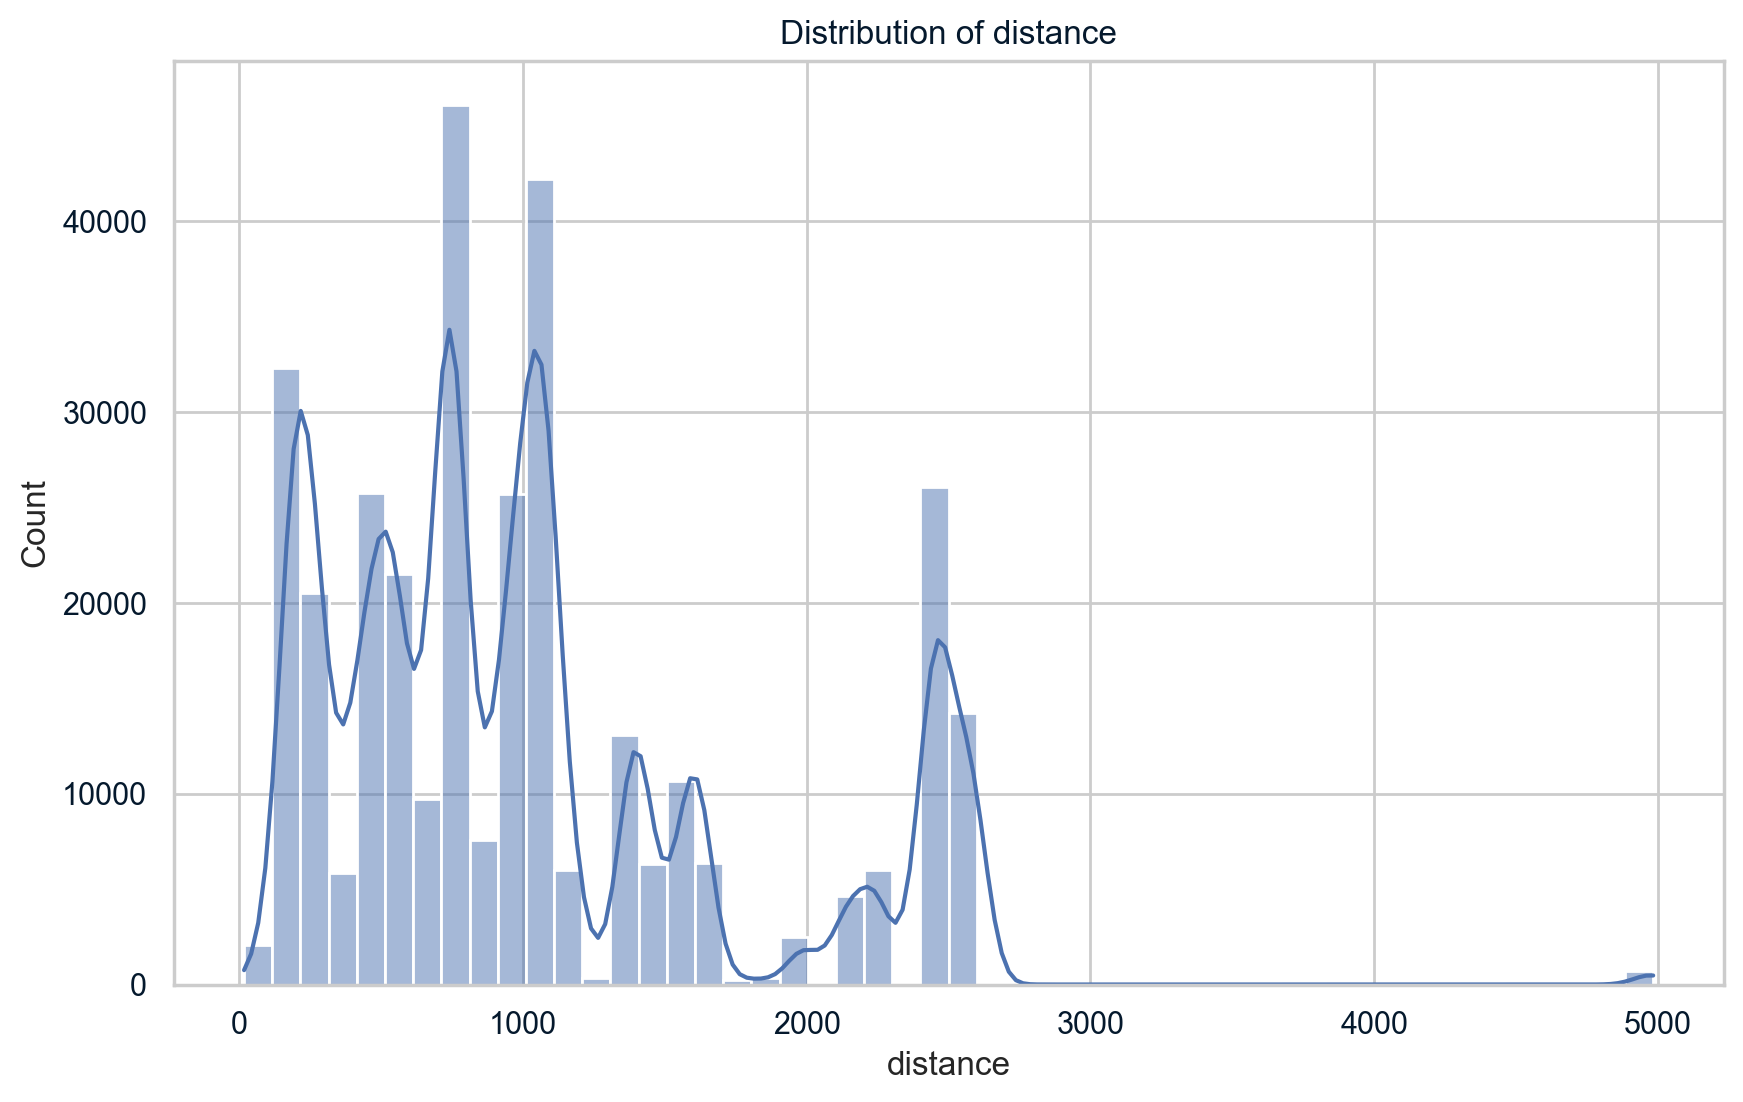

In [4]:
num_cols = ['dep_delay', 'arr_delay', 'air_time', 'distance']
for col in num_cols:
    sns.histplot(flights[col], kde=True, bins=50)
    plt.title(f'Distribution of {col}')
    plt.show()

 **2. Categorical Features**

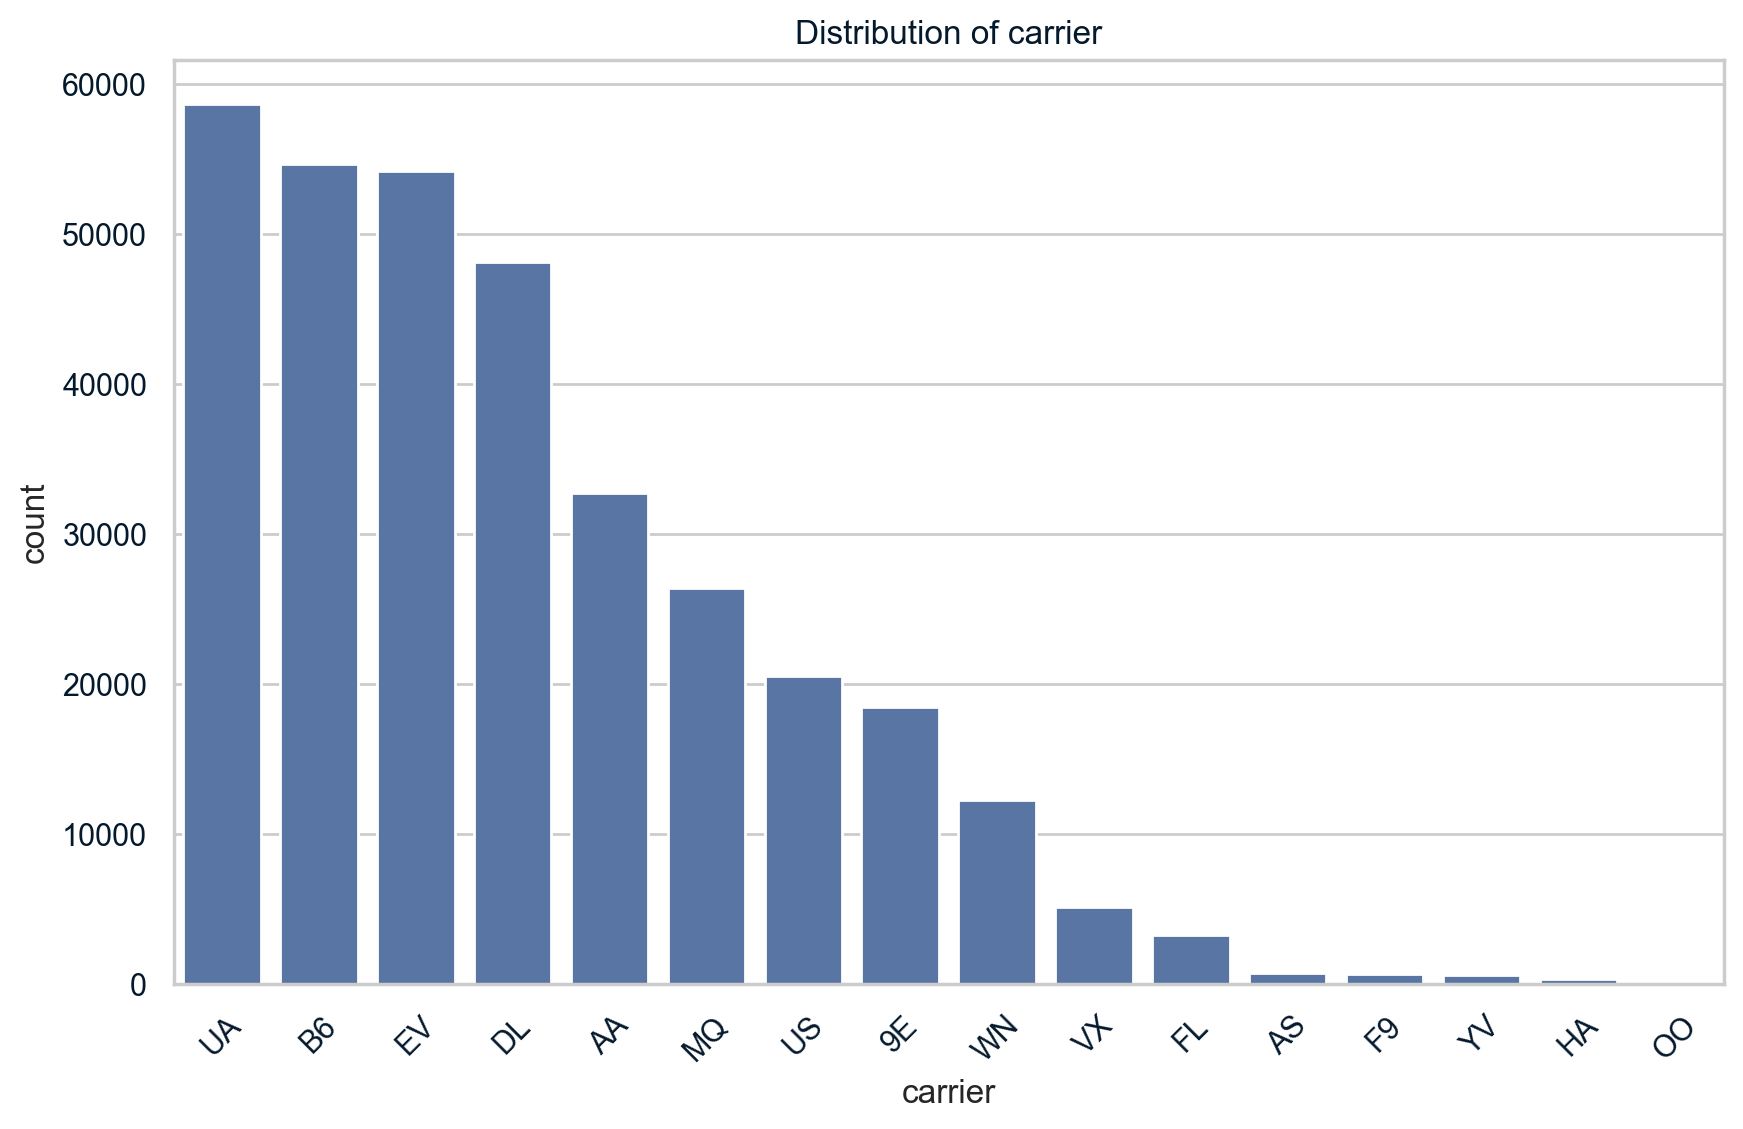

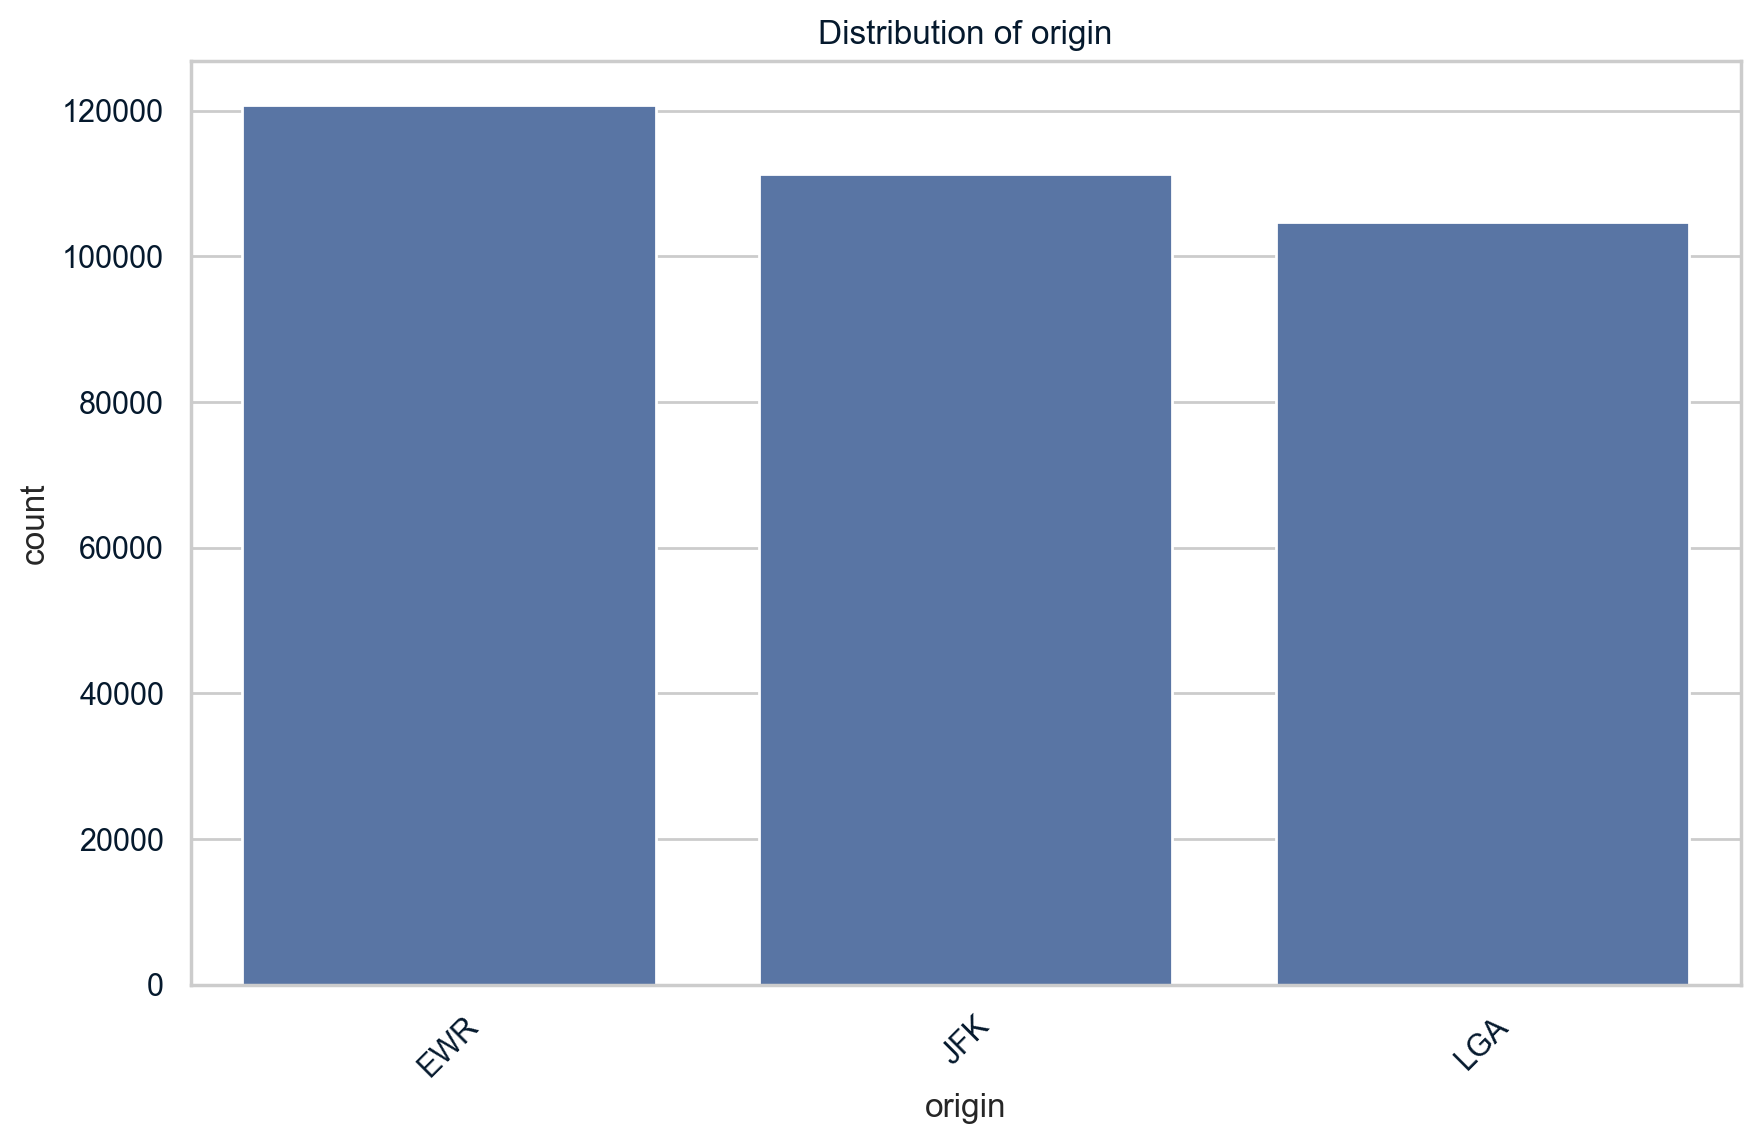

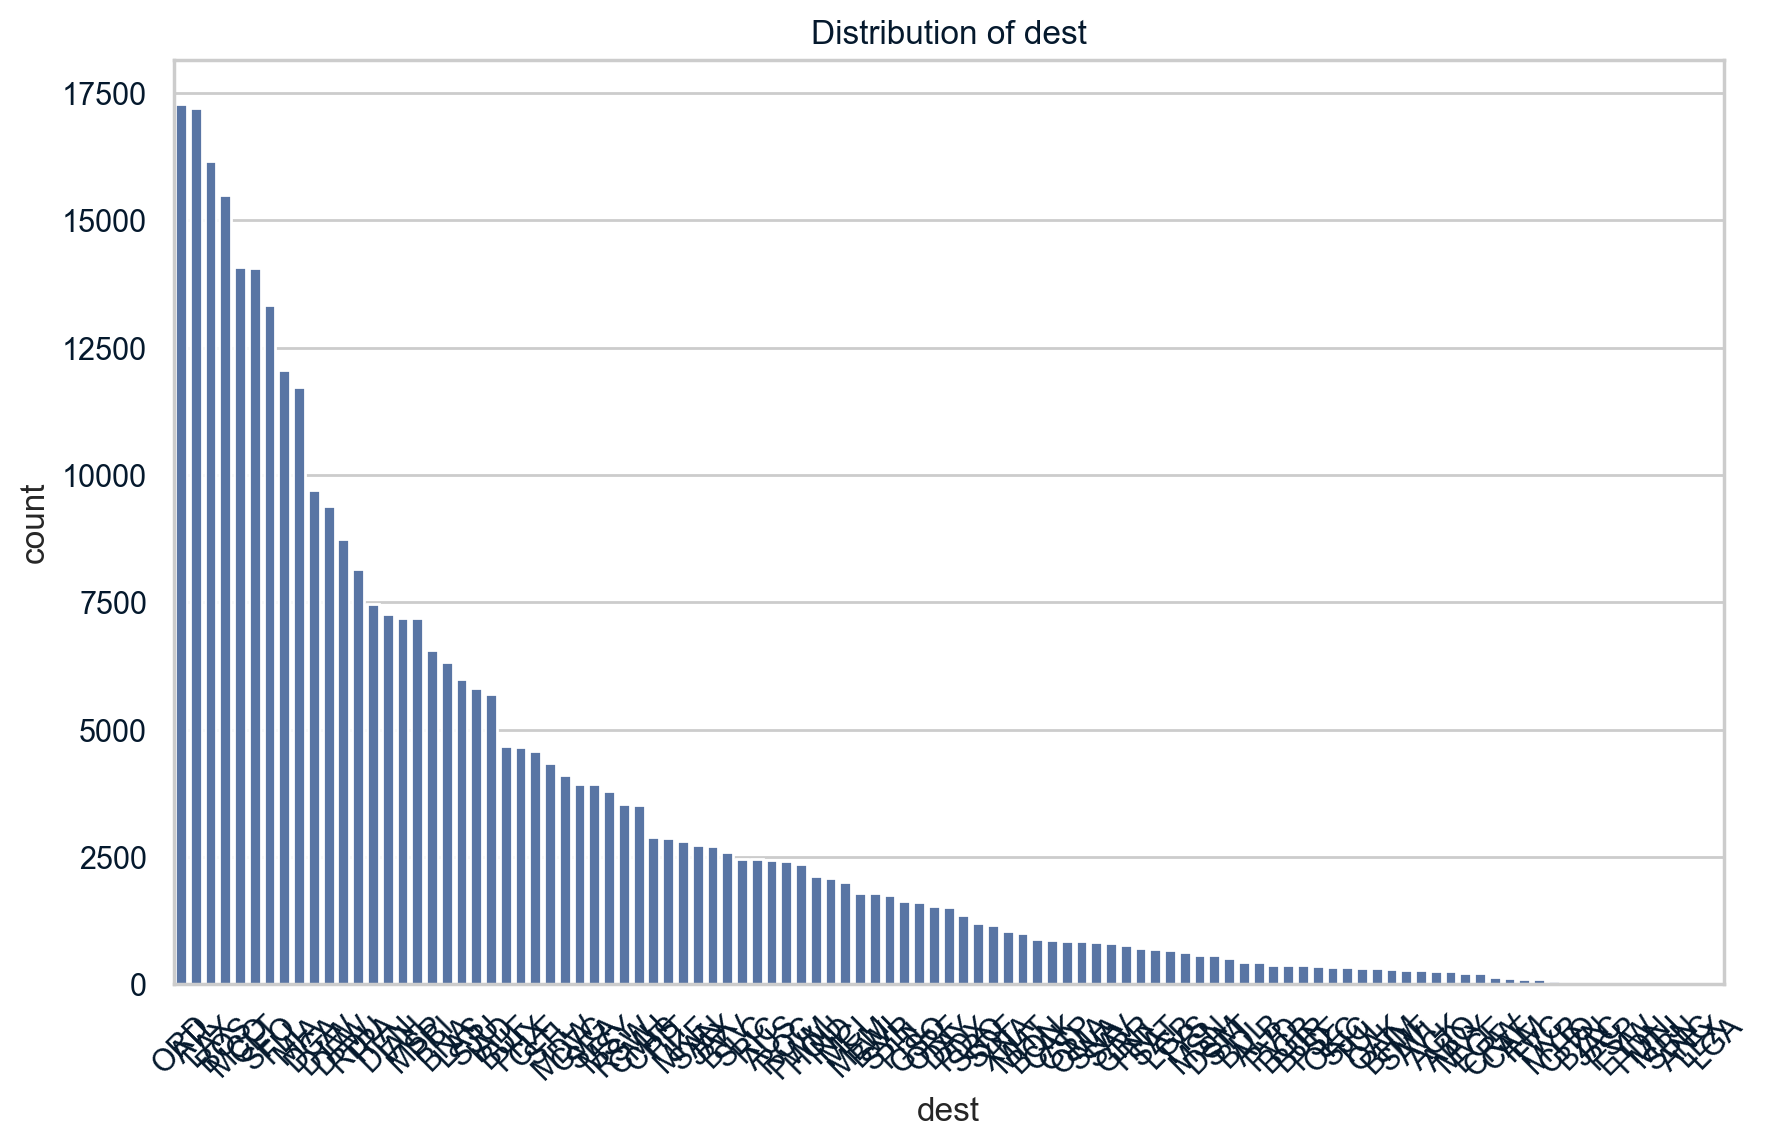

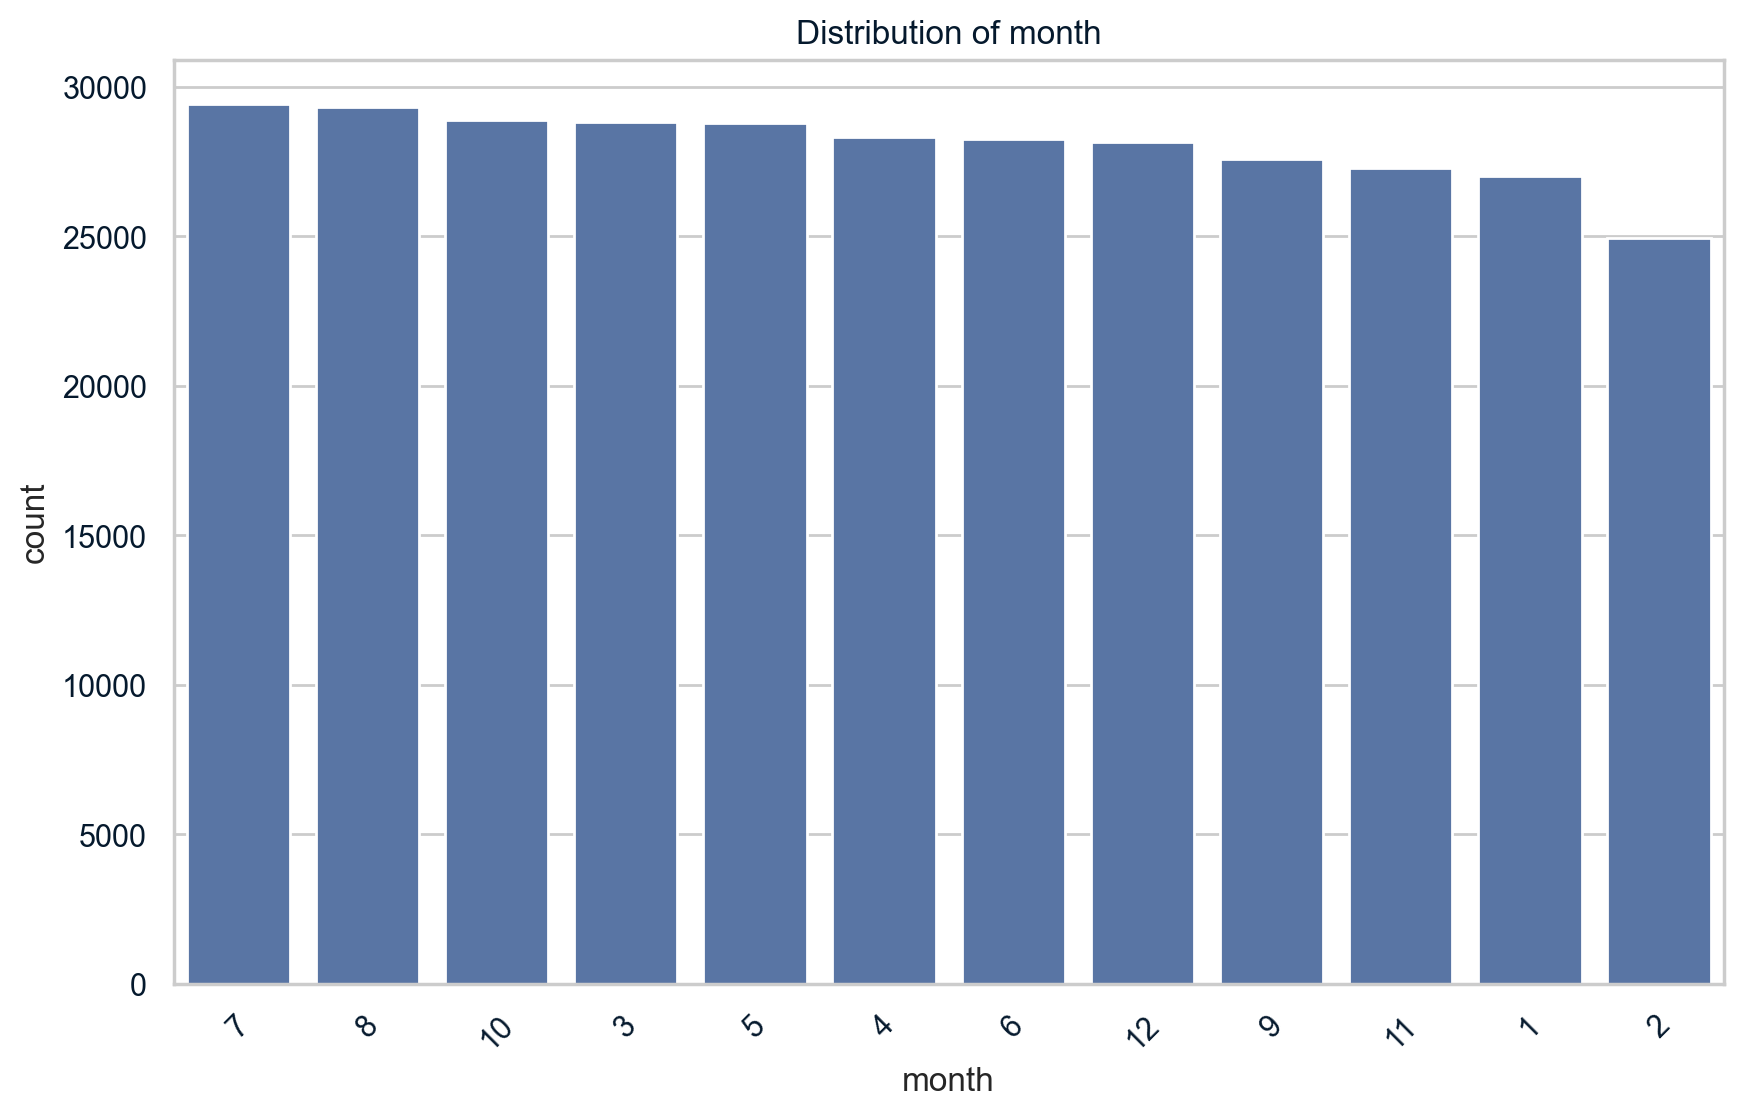

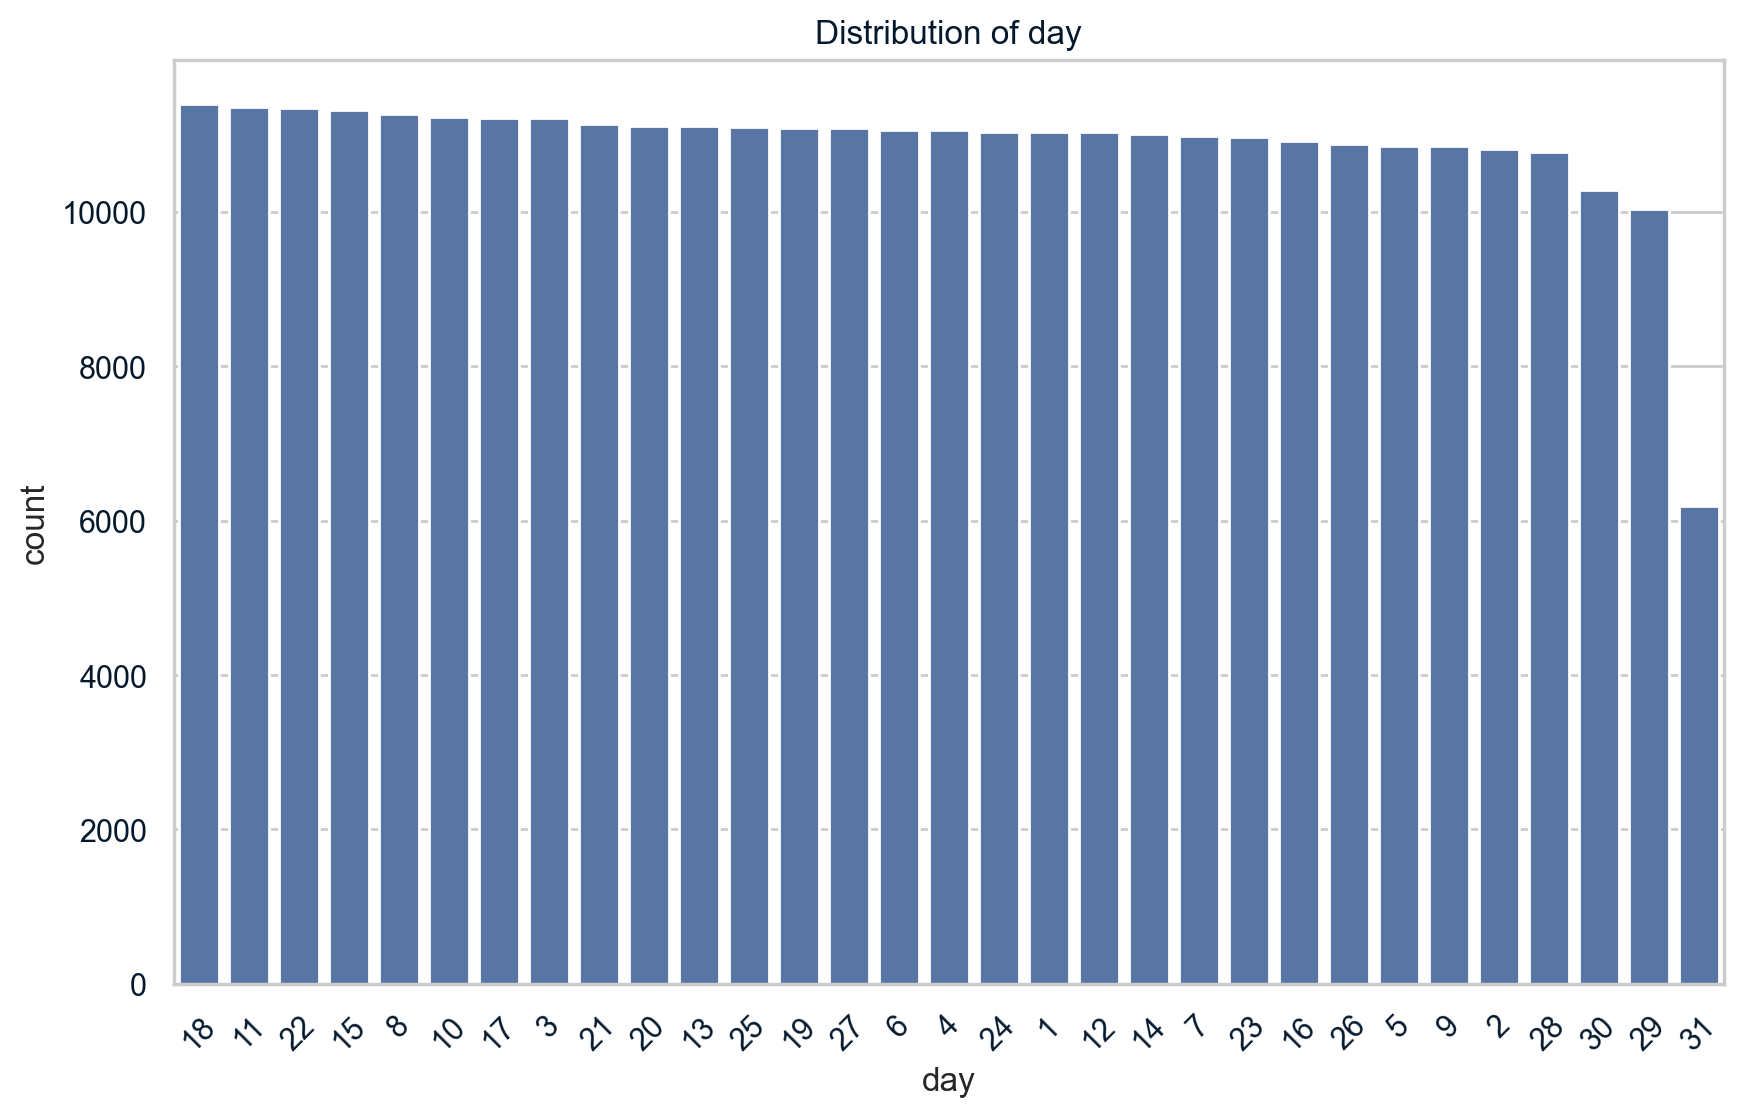

In [5]:
cat_cols = ['carrier', 'origin', 'dest', 'month', 'day']

for col in cat_cols:
    sns.countplot(data=flights, x=col, order=flights[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

###  Outlier Detection

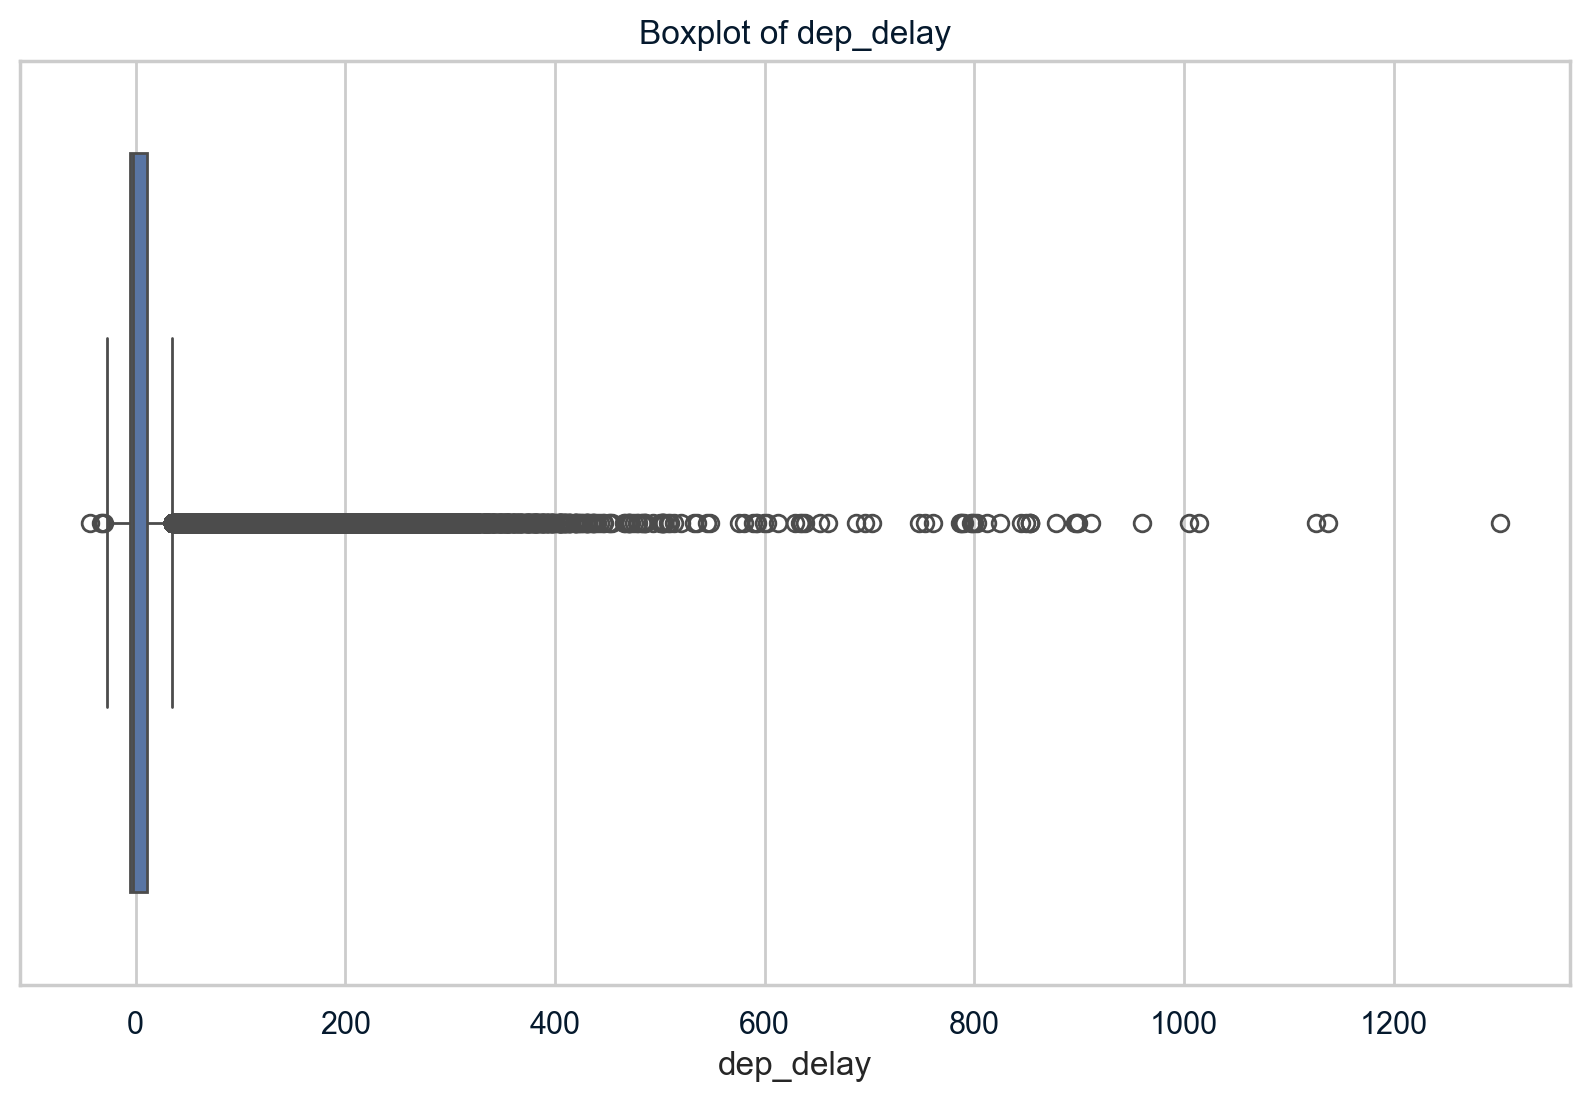

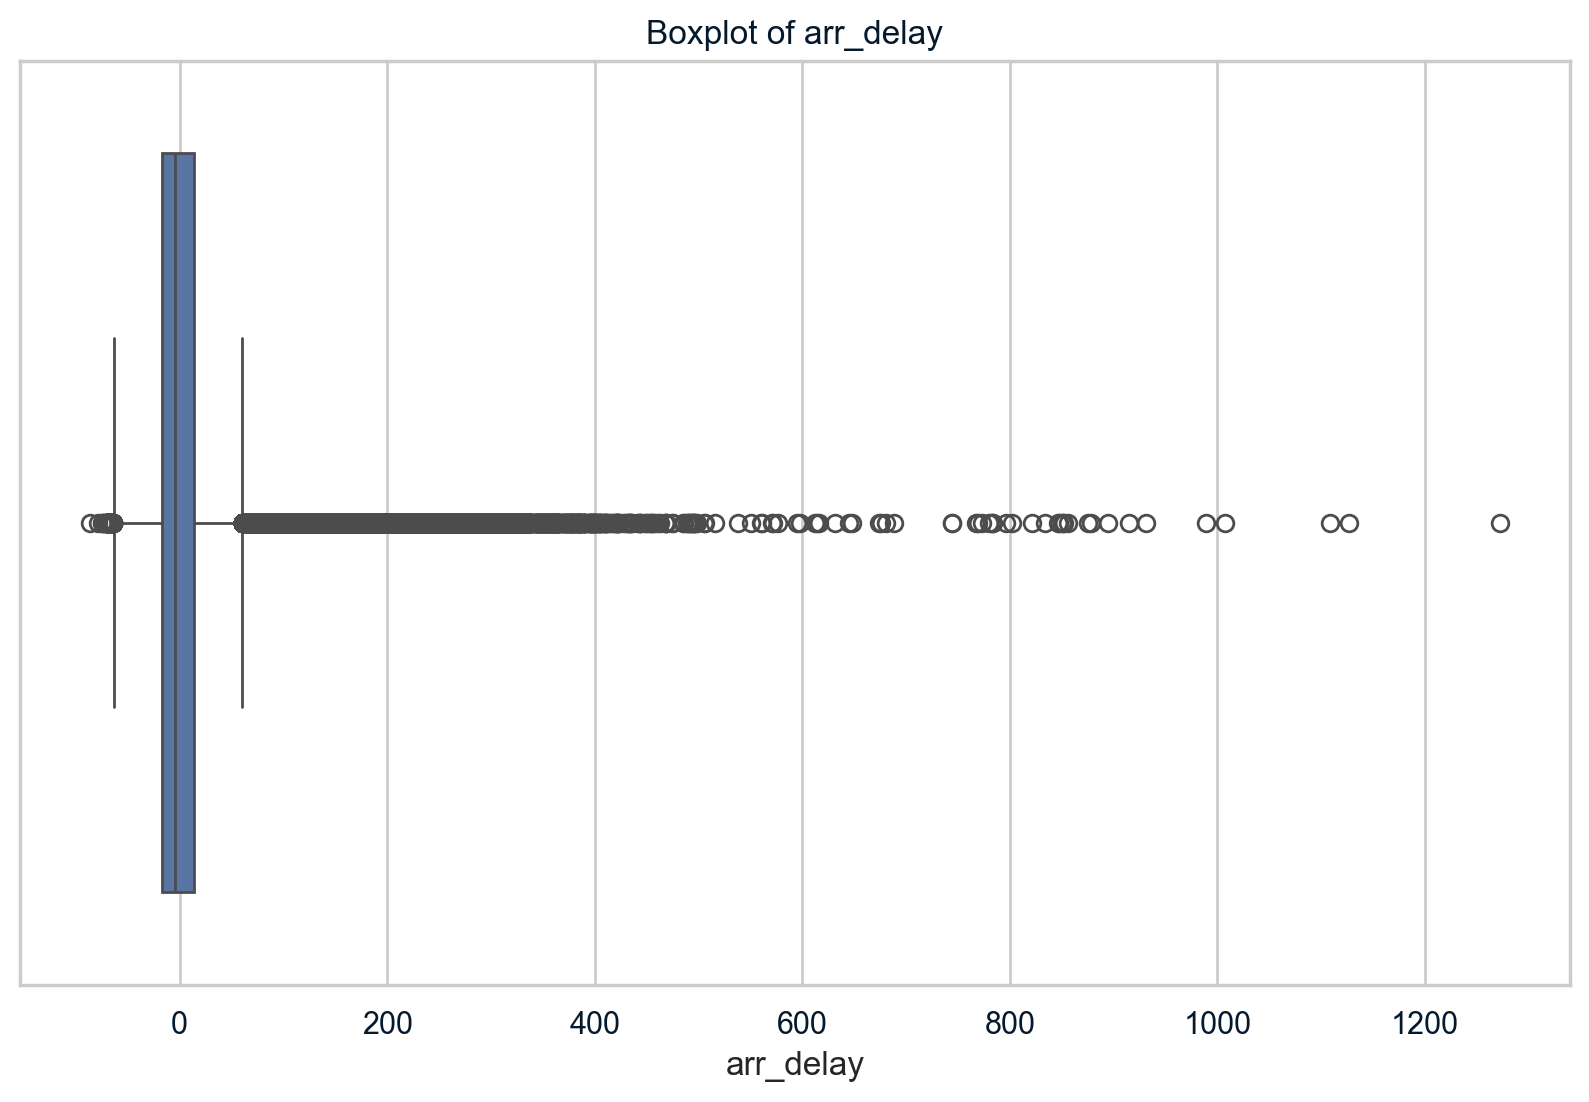

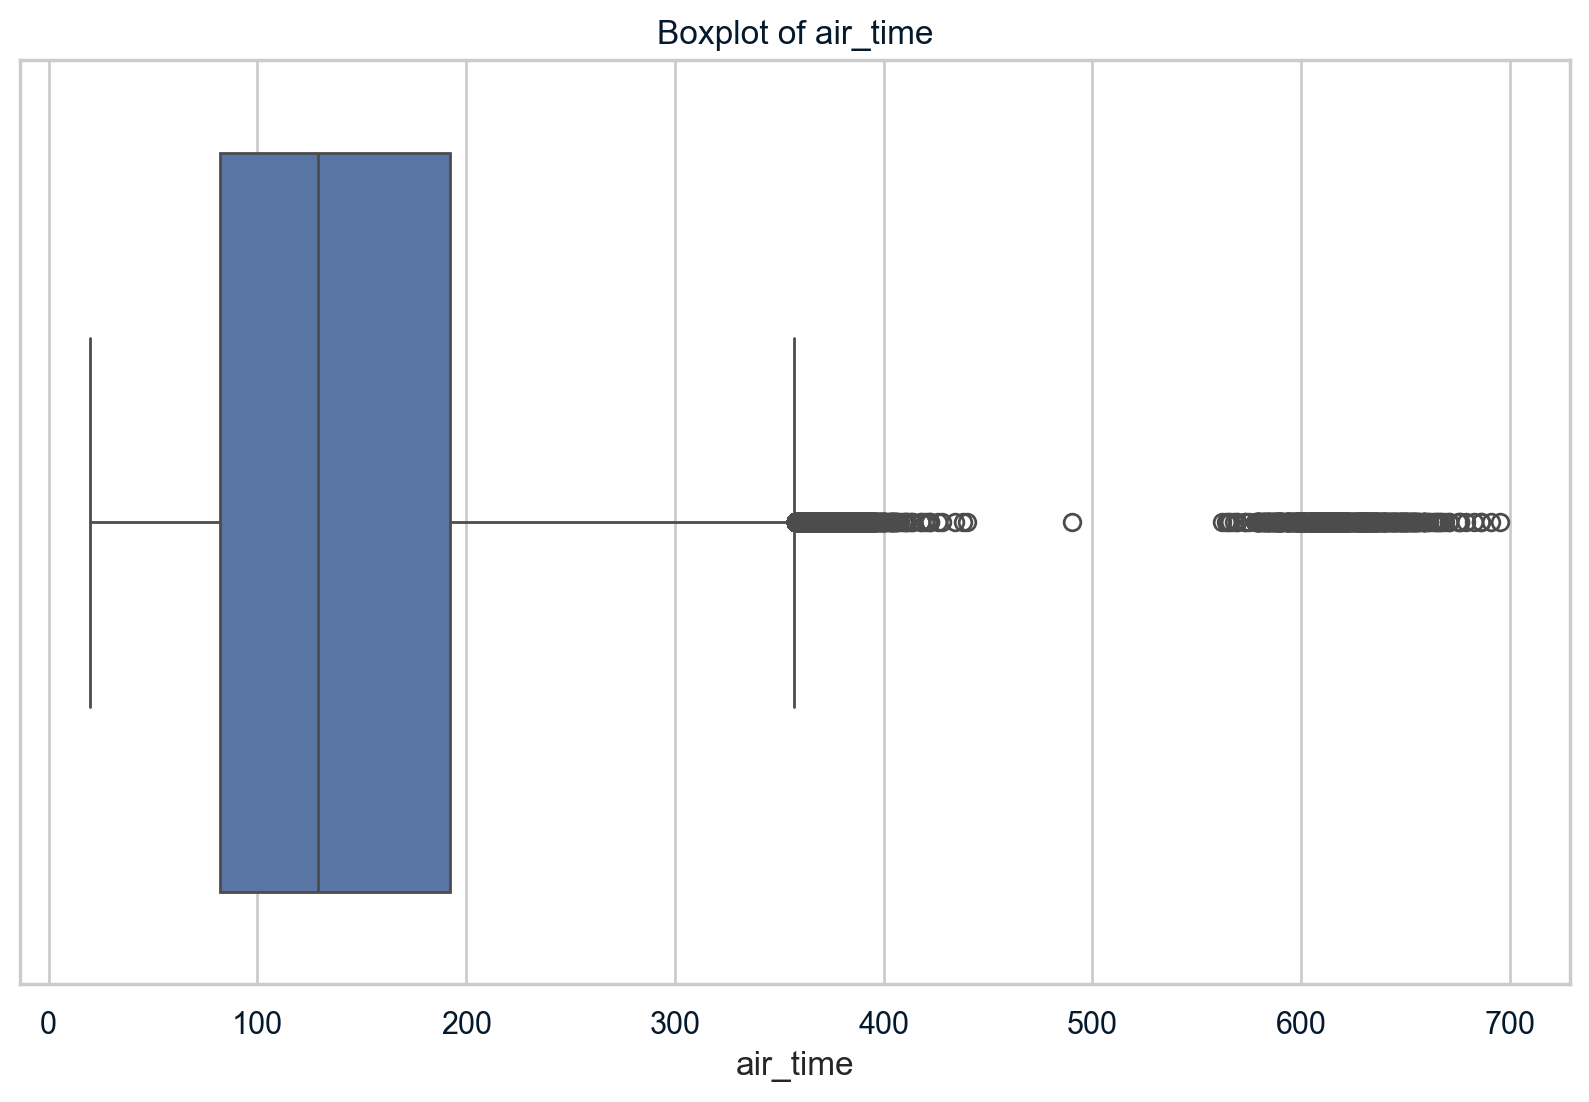

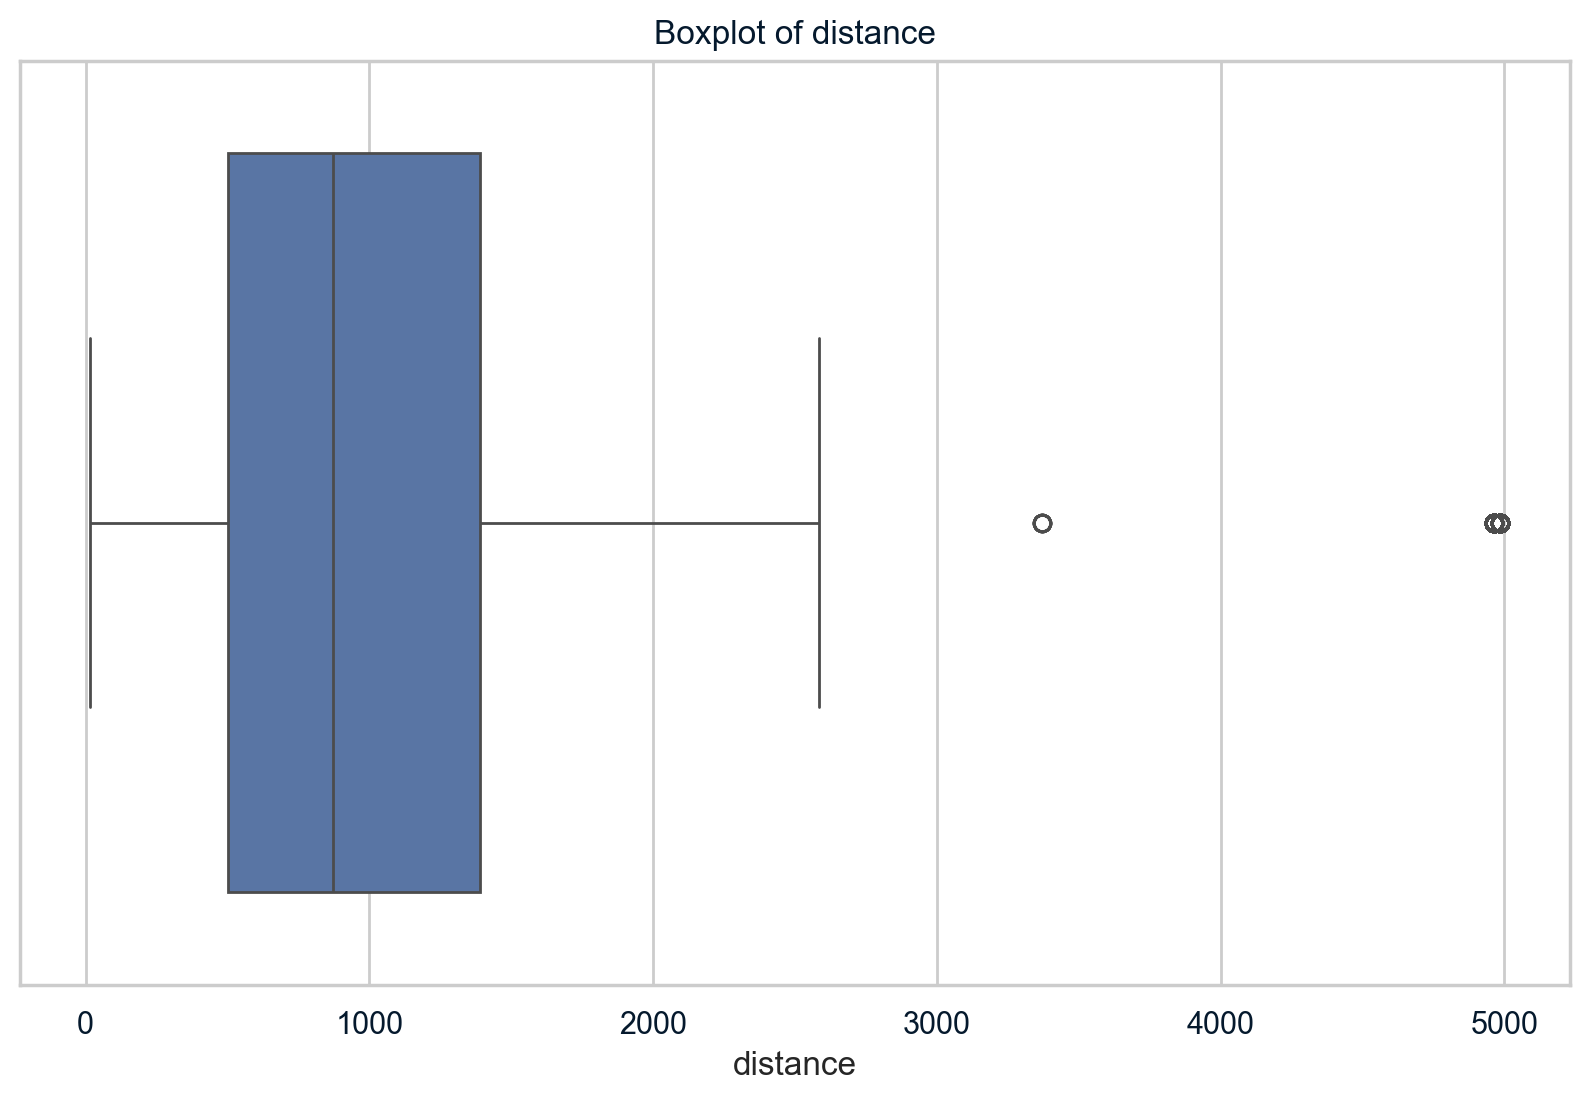

In [6]:
for col in num_cols:
    sns.boxplot(data=flights, x=col)
    plt.title(f'Boxplot of {col}')
    plt.show()

###  Bivariate Analysis

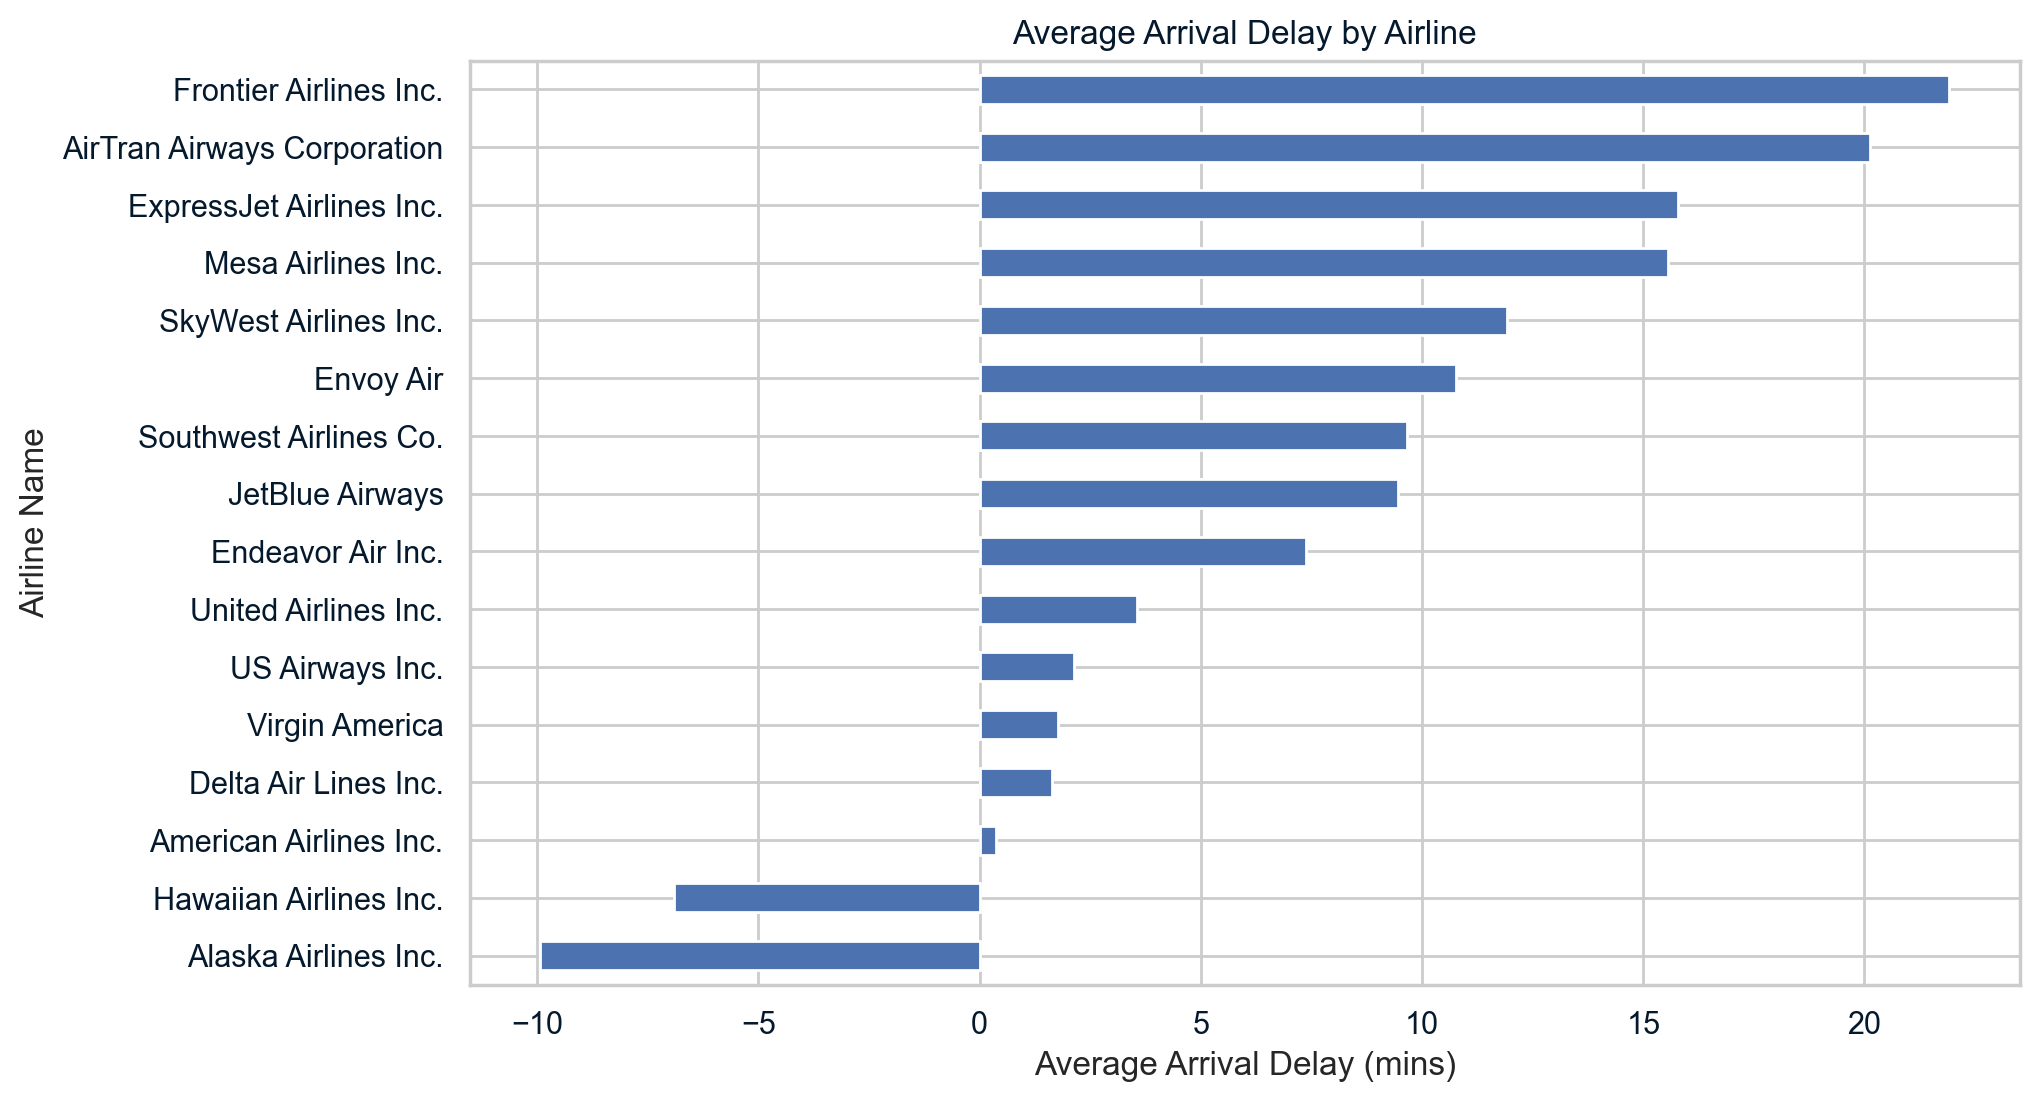

In [7]:
## Average delay by airline

delay_by_airline = flights.groupby('Airline Name')['arr_delay'].mean().sort_values()
delay_by_airline.plot(kind='barh', title='Average Arrival Delay by Airline')
plt.xlabel("Average Arrival Delay (mins)")
plt.show()

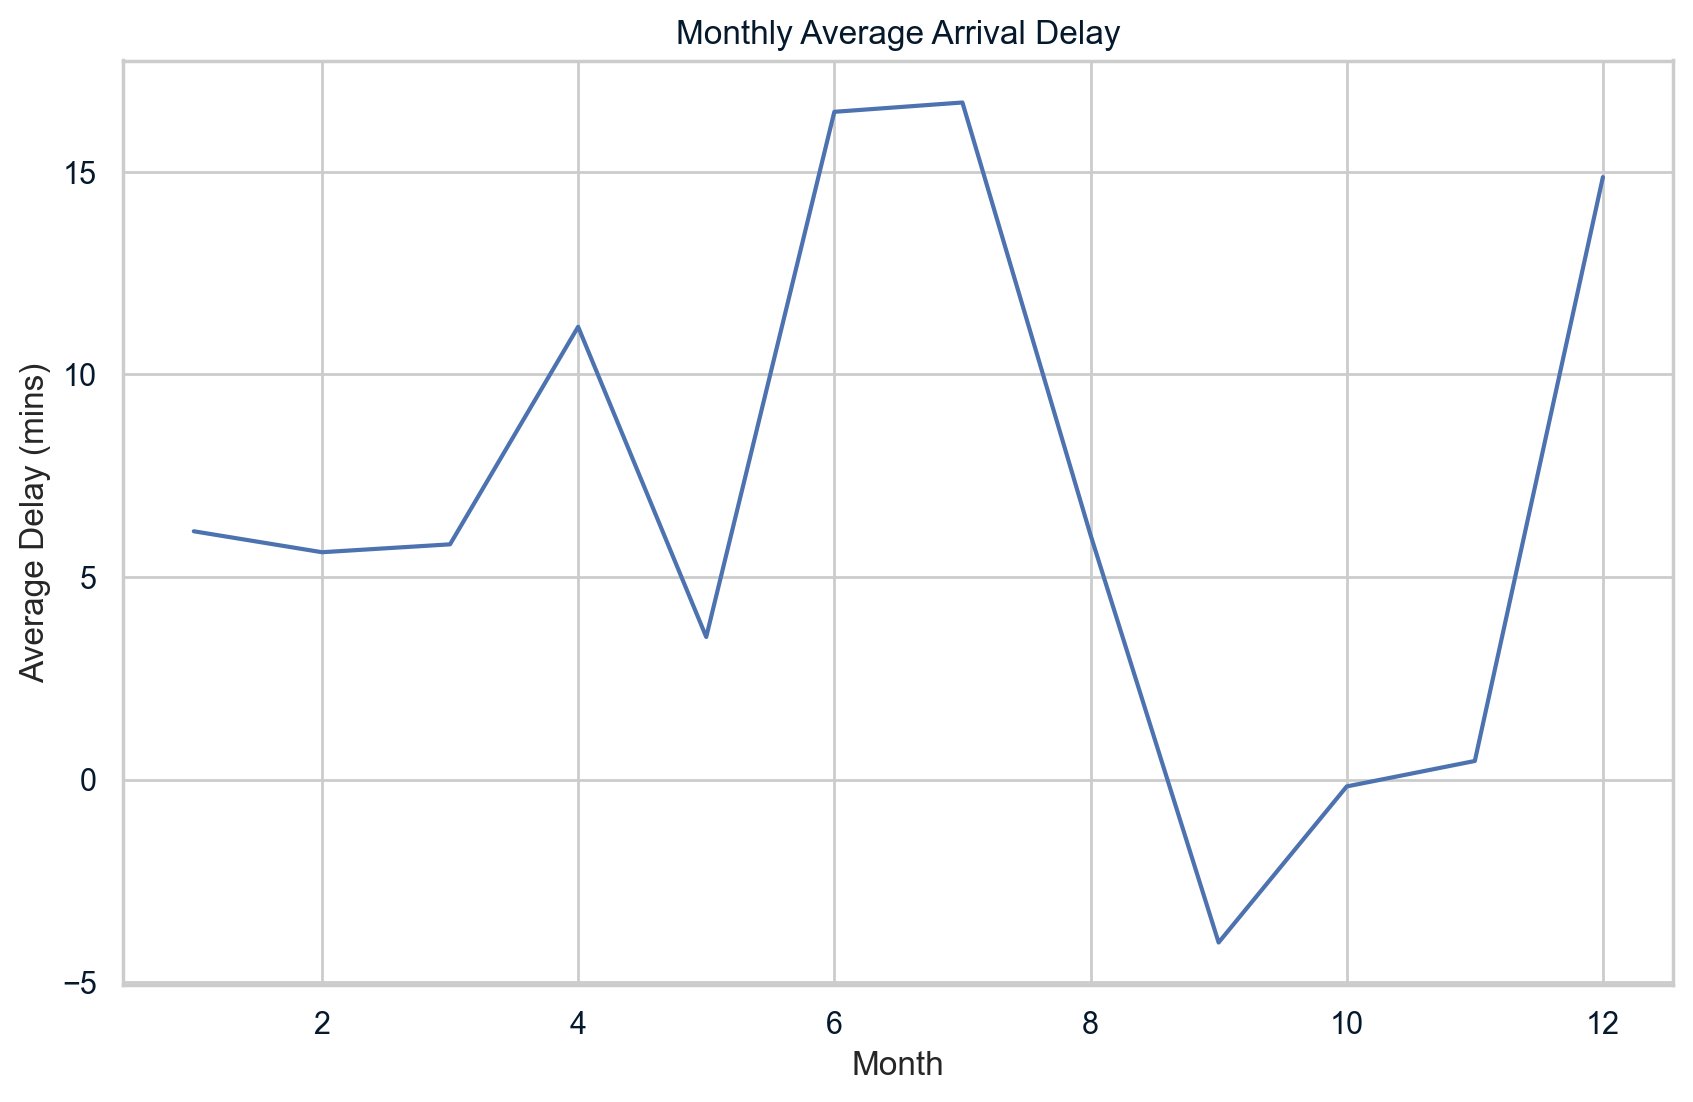

In [8]:
## Monthly average delay

monthly_delay = flights.groupby('month')['arr_delay'].mean()
sns.lineplot(x=monthly_delay.index, y=monthly_delay.values)
plt.title("Monthly Average Arrival Delay")
plt.xlabel("Month")
plt.ylabel("Average Delay (mins)")
plt.show()

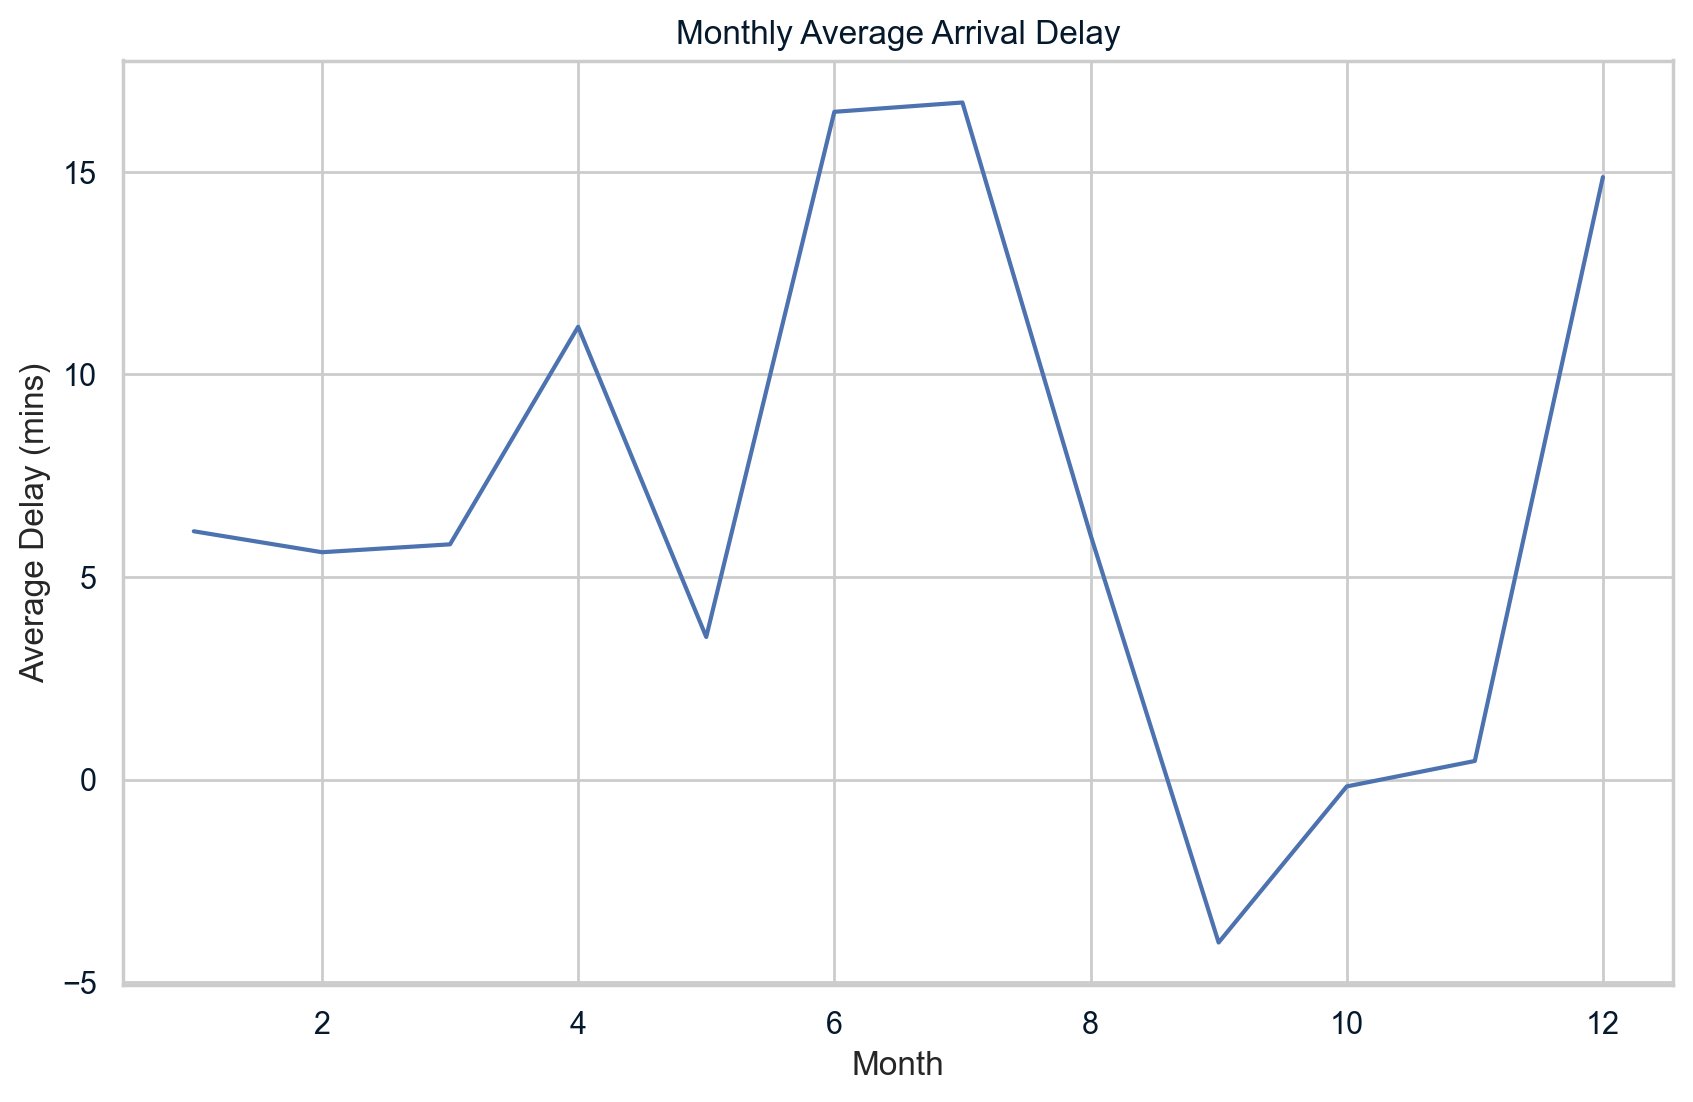

In [9]:
## Monthly average delay

monthly_delay = flights.groupby('month')['arr_delay'].mean()
sns.lineplot(x=monthly_delay.index, y=monthly_delay.values)
plt.title("Monthly Average Arrival Delay")
plt.xlabel("Month")
plt.ylabel("Average Delay (mins)")
plt.show()

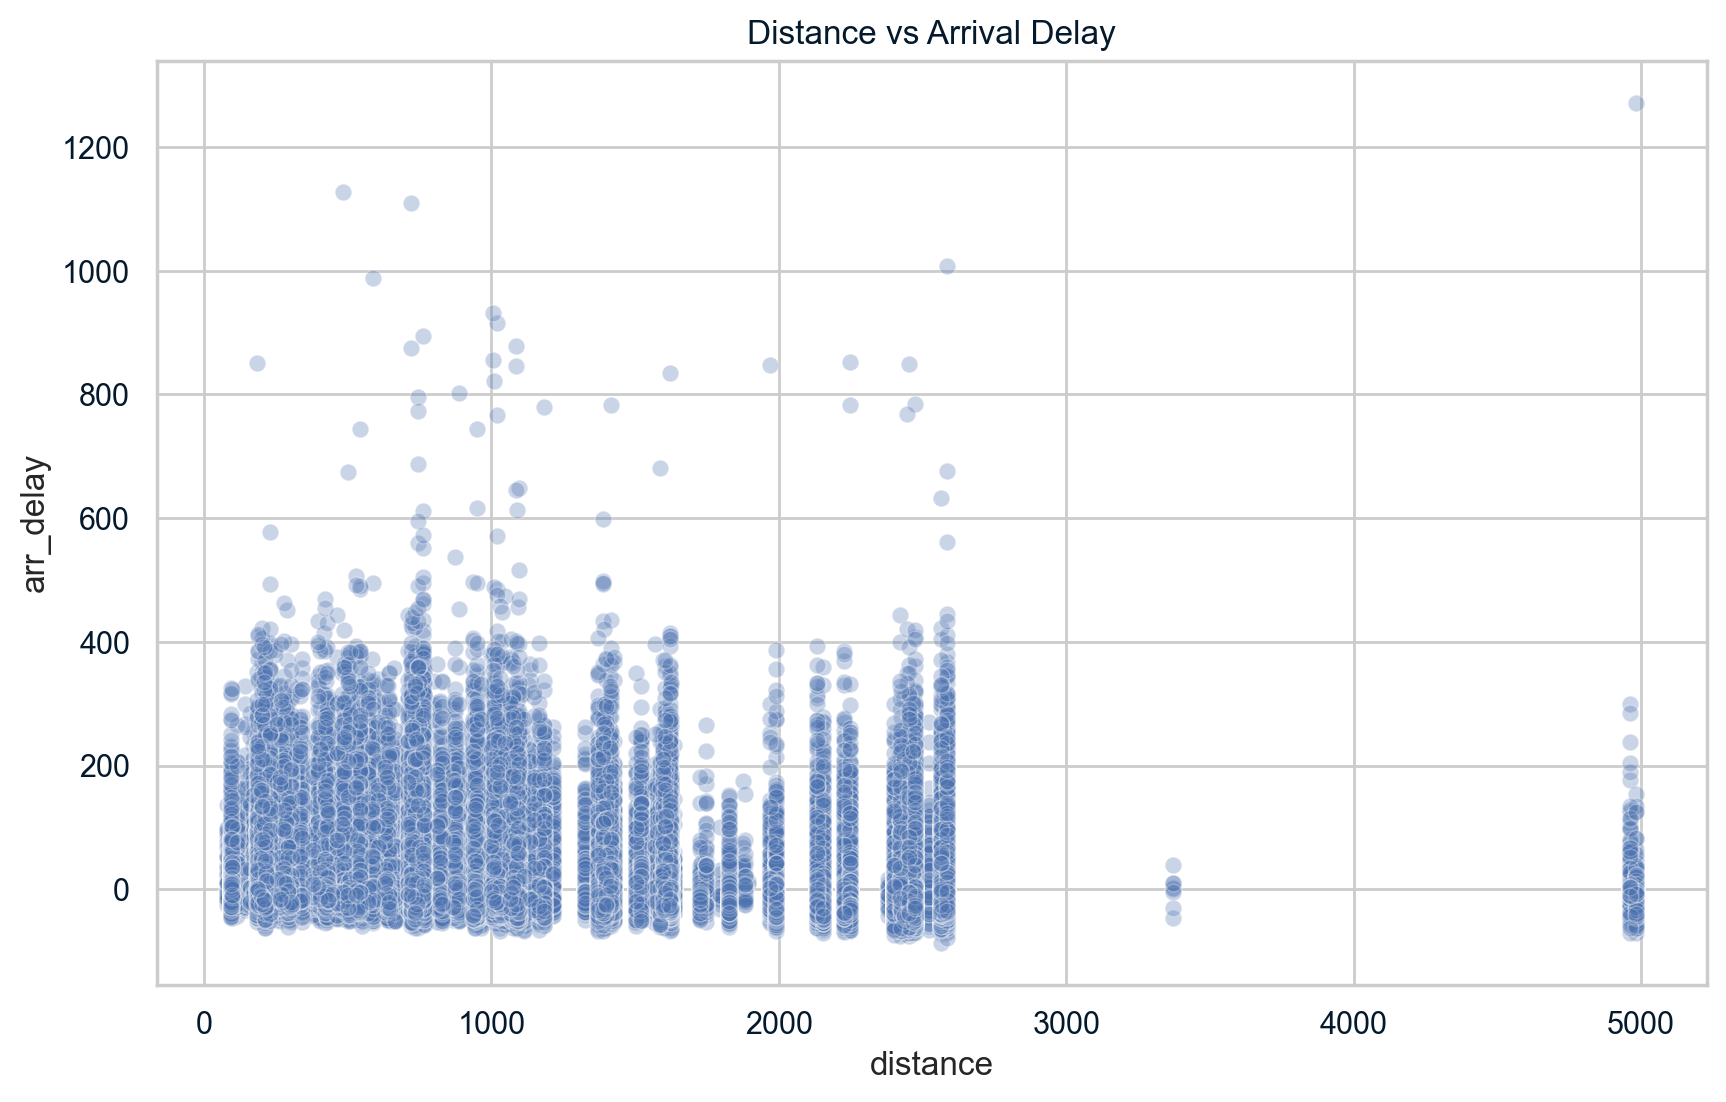

In [10]:
## Scatter plot: Distance vs Arrival Delay

sns.scatterplot(data=flights, x='distance', y='arr_delay', alpha=0.3)
plt.title("Distance vs Arrival Delay")
plt.show()

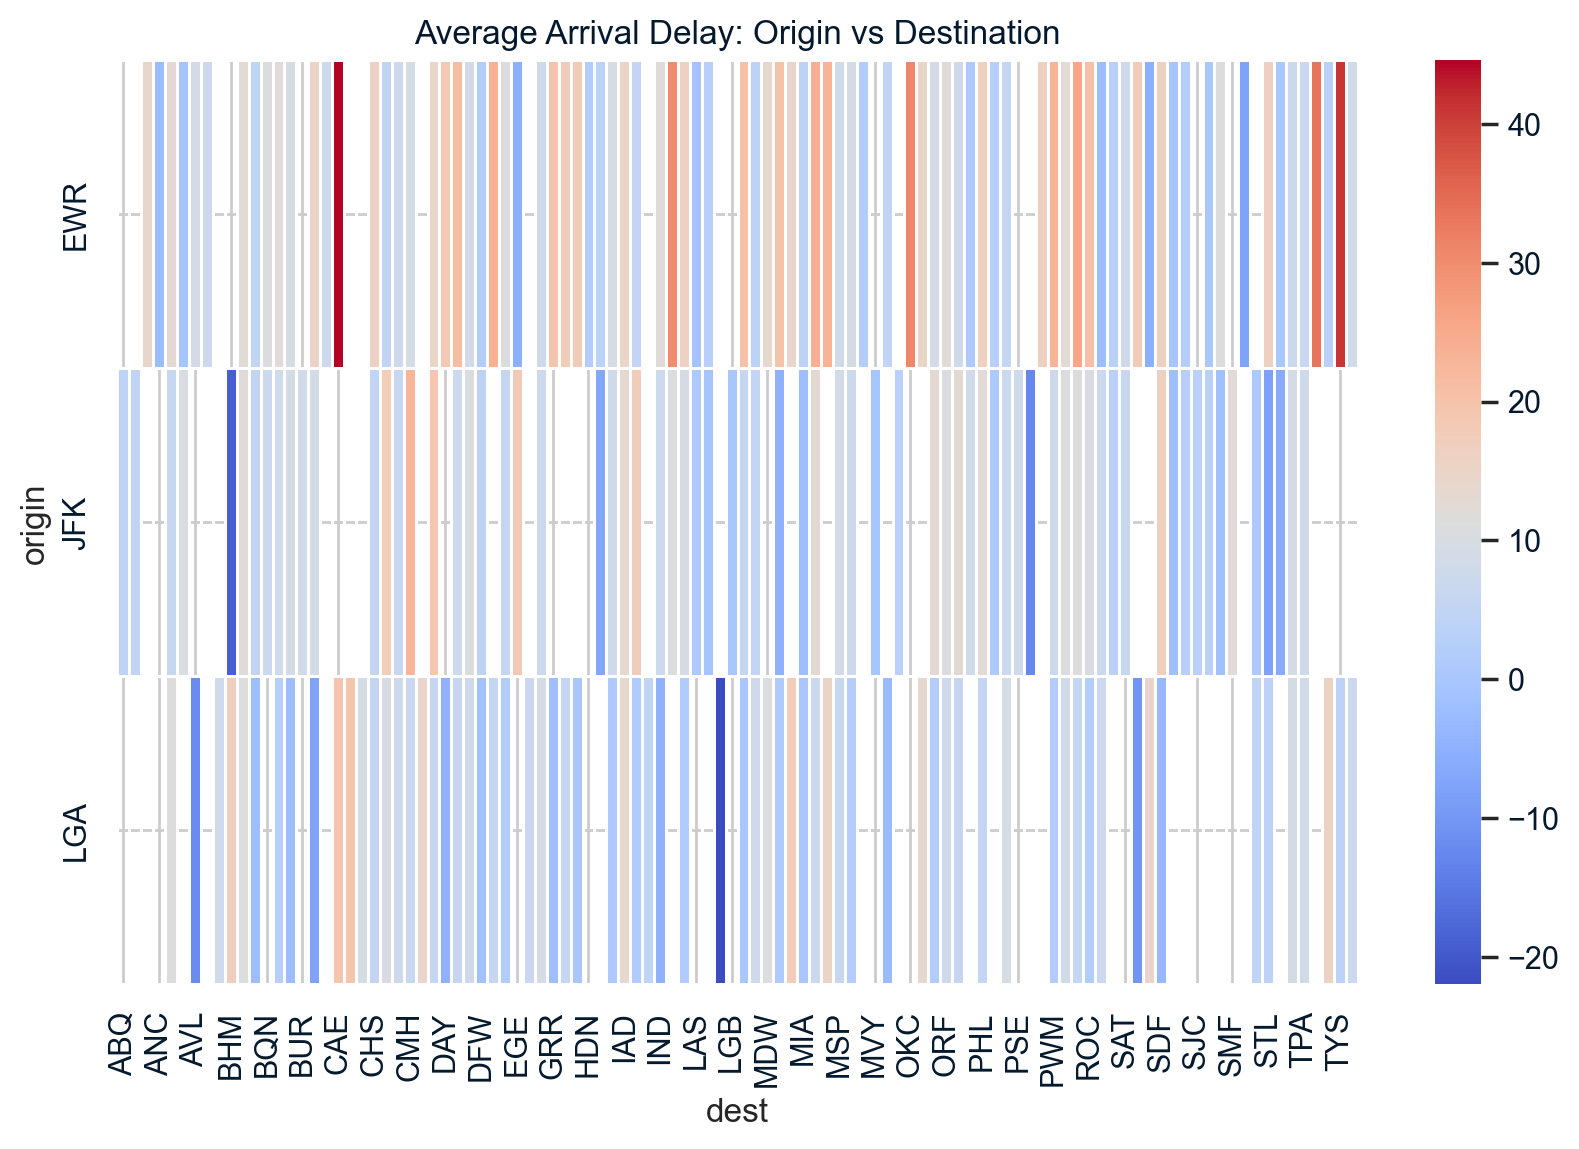

In [11]:
## Heatmap: Origin vs Destination Delay

pivot = flights.pivot_table(index='origin', columns='dest', values='arr_delay', aggfunc='mean')
sns.heatmap(pivot, cmap='coolwarm', linewidths=0.5)
plt.title("Average Arrival Delay: Origin vs Destination")
plt.show()

###  Correlation Analysis

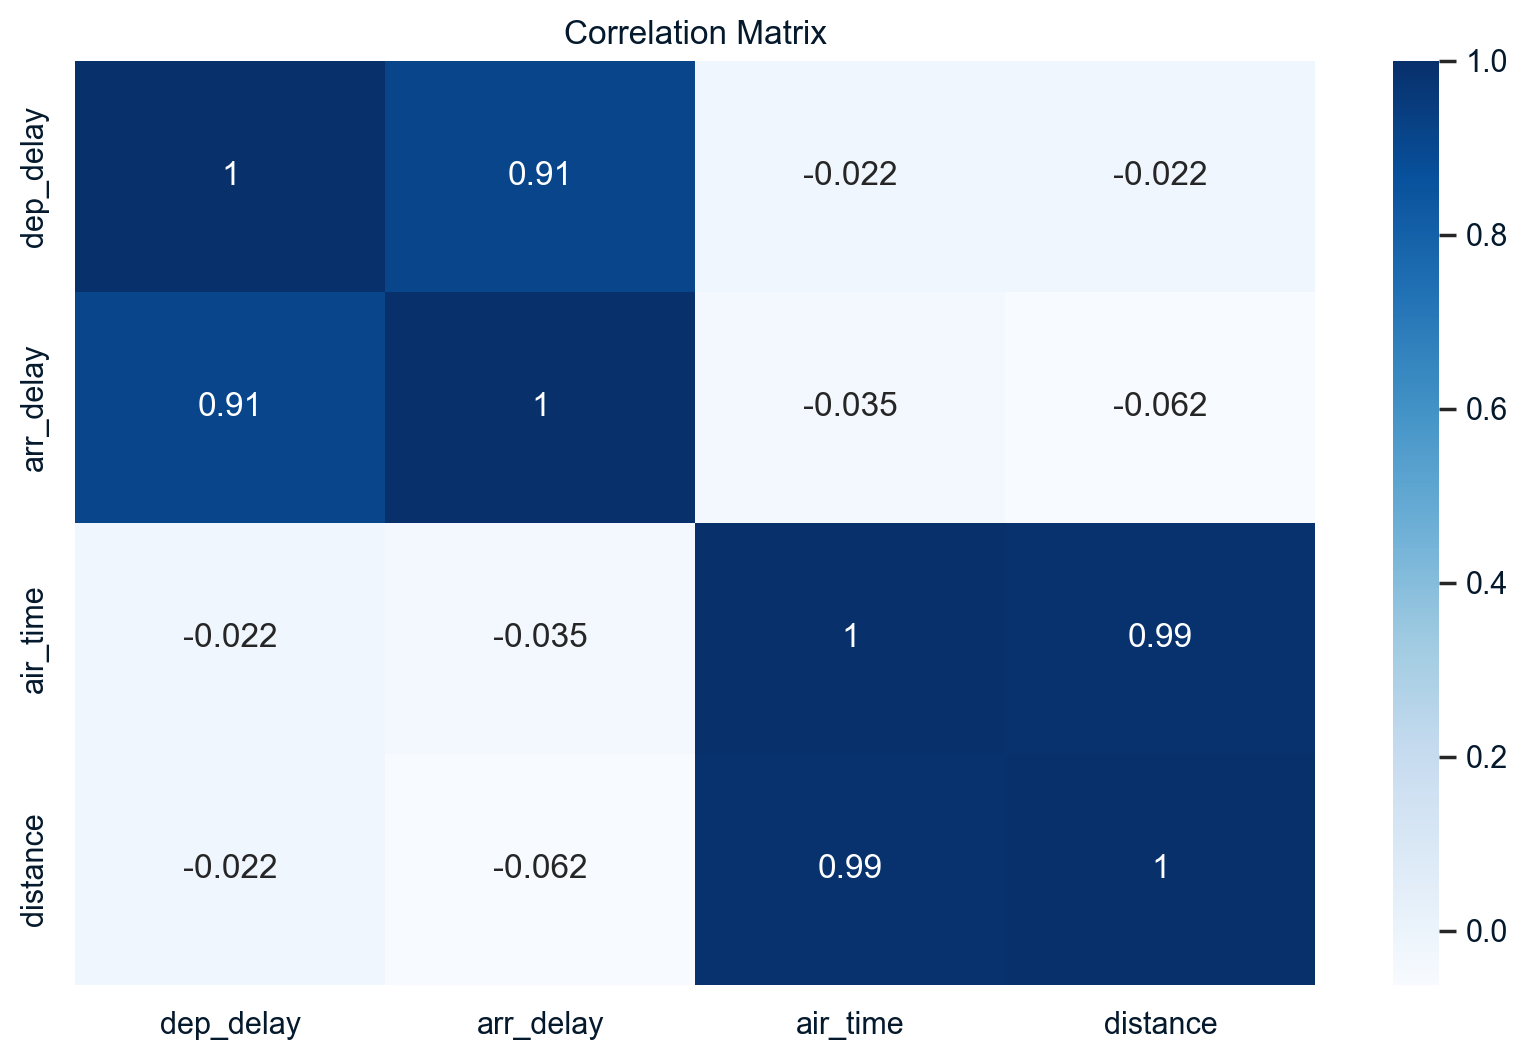

In [12]:
corr = flights[['dep_delay', 'arr_delay', 'air_time', 'distance']].corr()
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title("Correlation Matrix")
plt.show()

## Delay Patterns

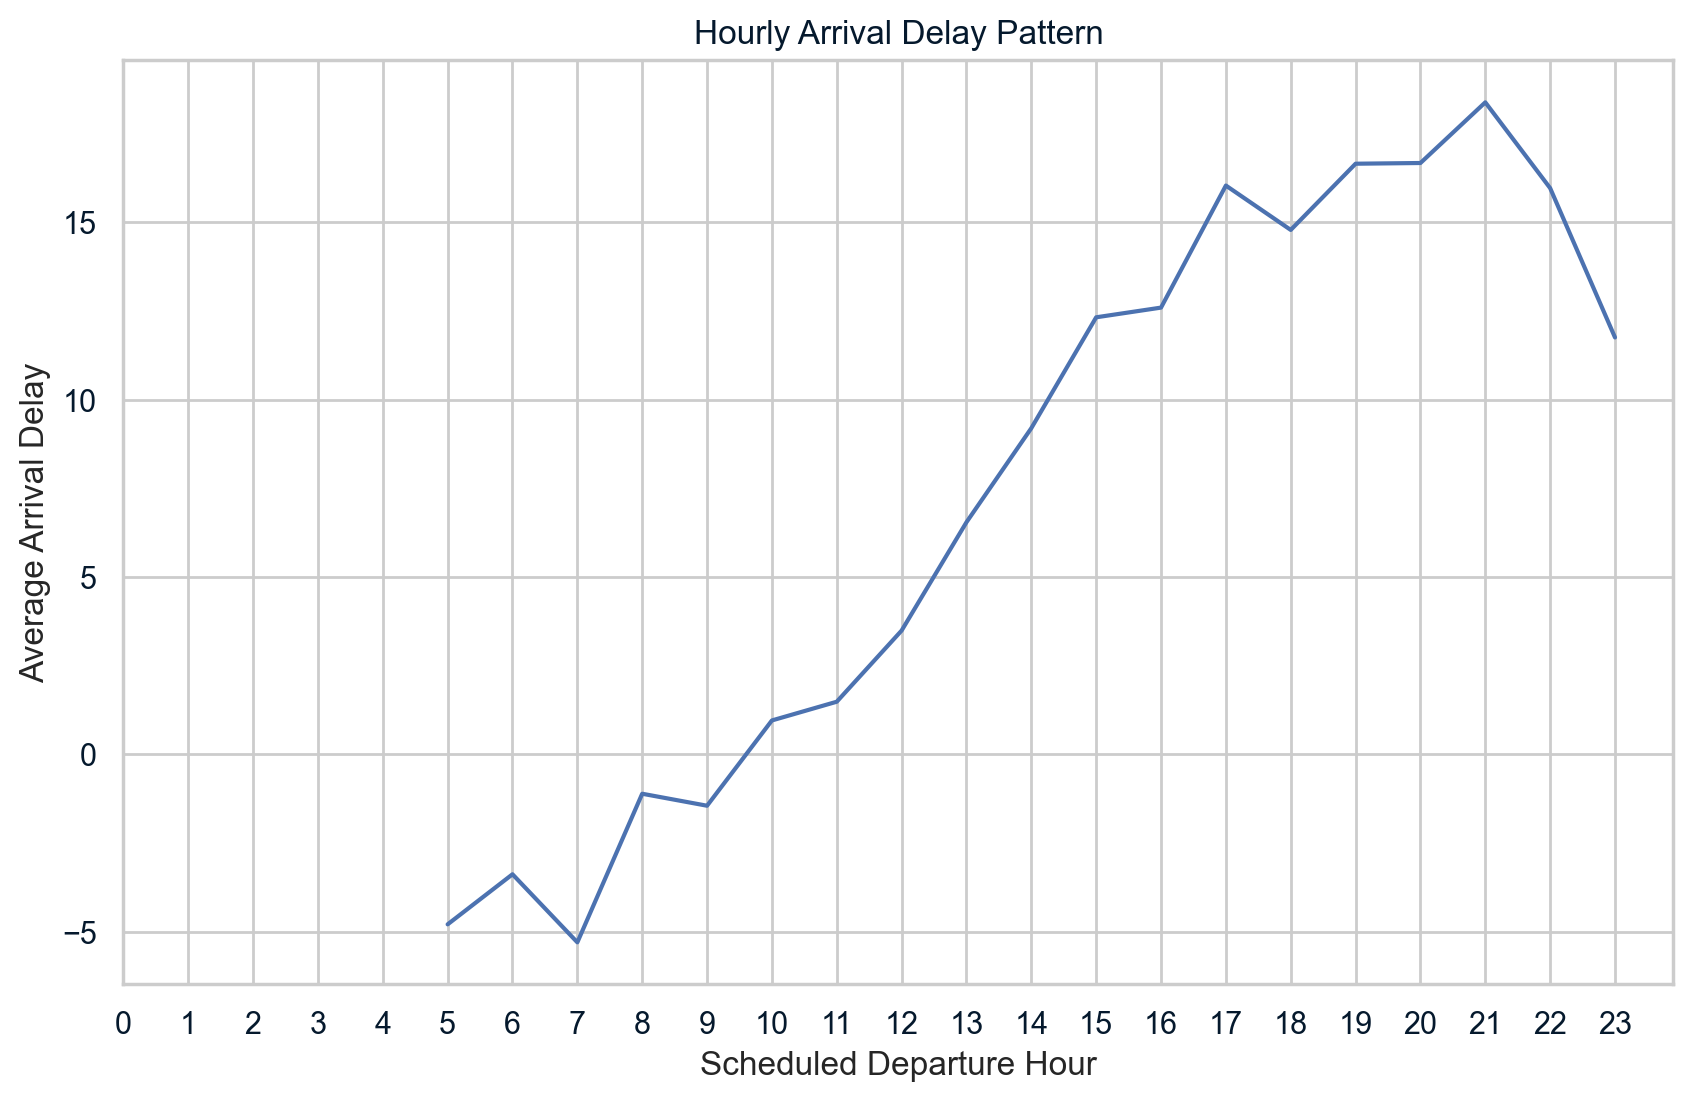

In [13]:
# Delays by hour
hourly_delay = flights.groupby('hour')['arr_delay'].mean()
sns.lineplot(x=hourly_delay.index, y=hourly_delay.values)
plt.title("Hourly Arrival Delay Pattern")
plt.xlabel("Scheduled Departure Hour")
plt.ylabel("Average Arrival Delay")
plt.xticks(range(0, 24))
plt.show()

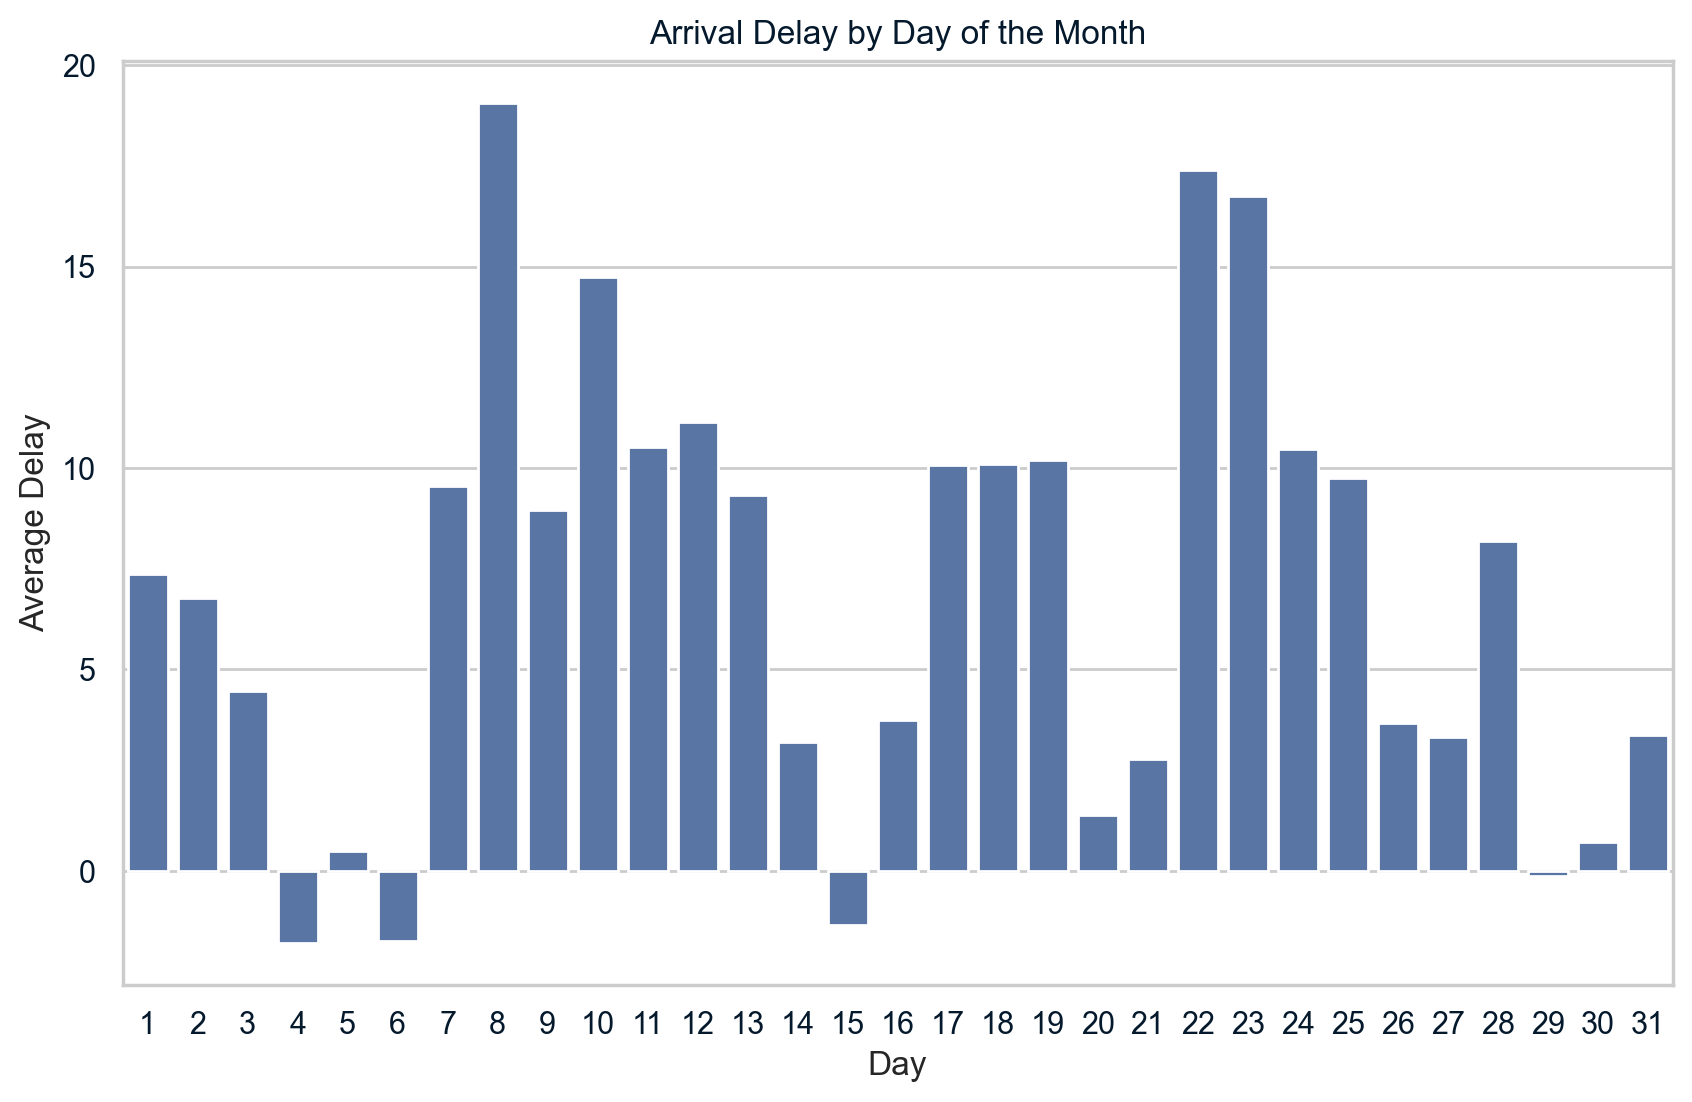

In [14]:
# Delays by day of month
daily_delay = flights.groupby('day')['arr_delay'].mean()
sns.barplot(x=daily_delay.index, y=daily_delay.values)
plt.title("Arrival Delay by Day of the Month")
plt.xlabel("Day")
plt.ylabel("Average Delay")
plt.show()

### _**1. Airline Comparison of Departure and Arrival Delays Over the Year**_

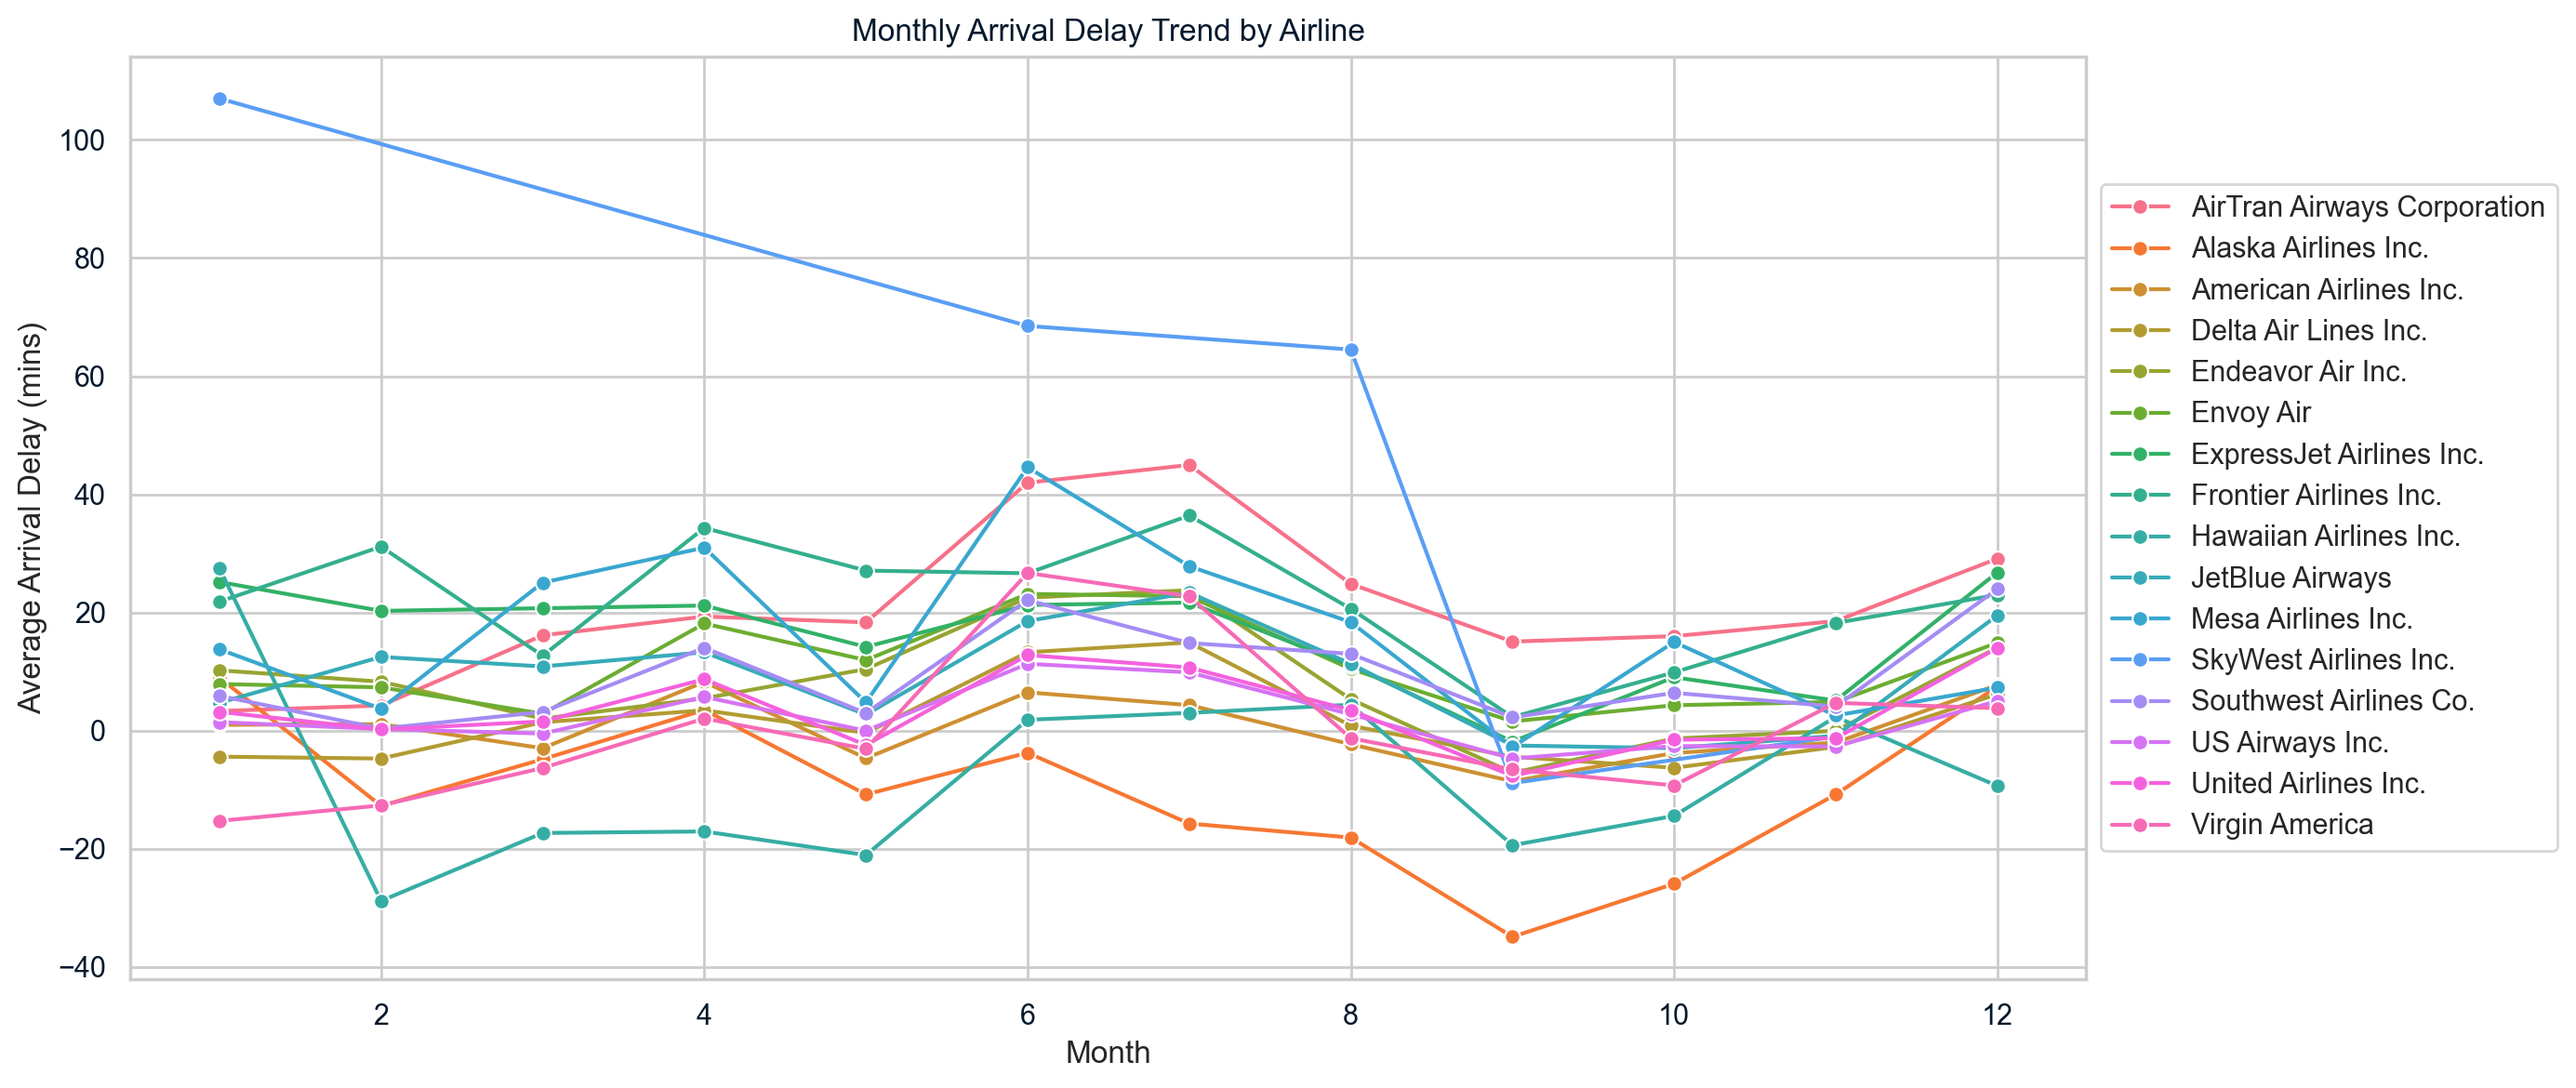

In [15]:
airline_delay = flights.groupby(['Airline Name', 'month'])[['dep_delay', 'arr_delay']].mean().reset_index()


plt.figure(figsize=(14, 6))
sns.lineplot(data=airline_delay, x='month', y='arr_delay', hue='Airline Name', marker="o")
plt.title("Monthly Arrival Delay Trend by Airline")
plt.ylabel("Average Arrival Delay (mins)")
plt.xlabel("Month")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

**_2. Delay Trends by Month, Week, Time of Day_**

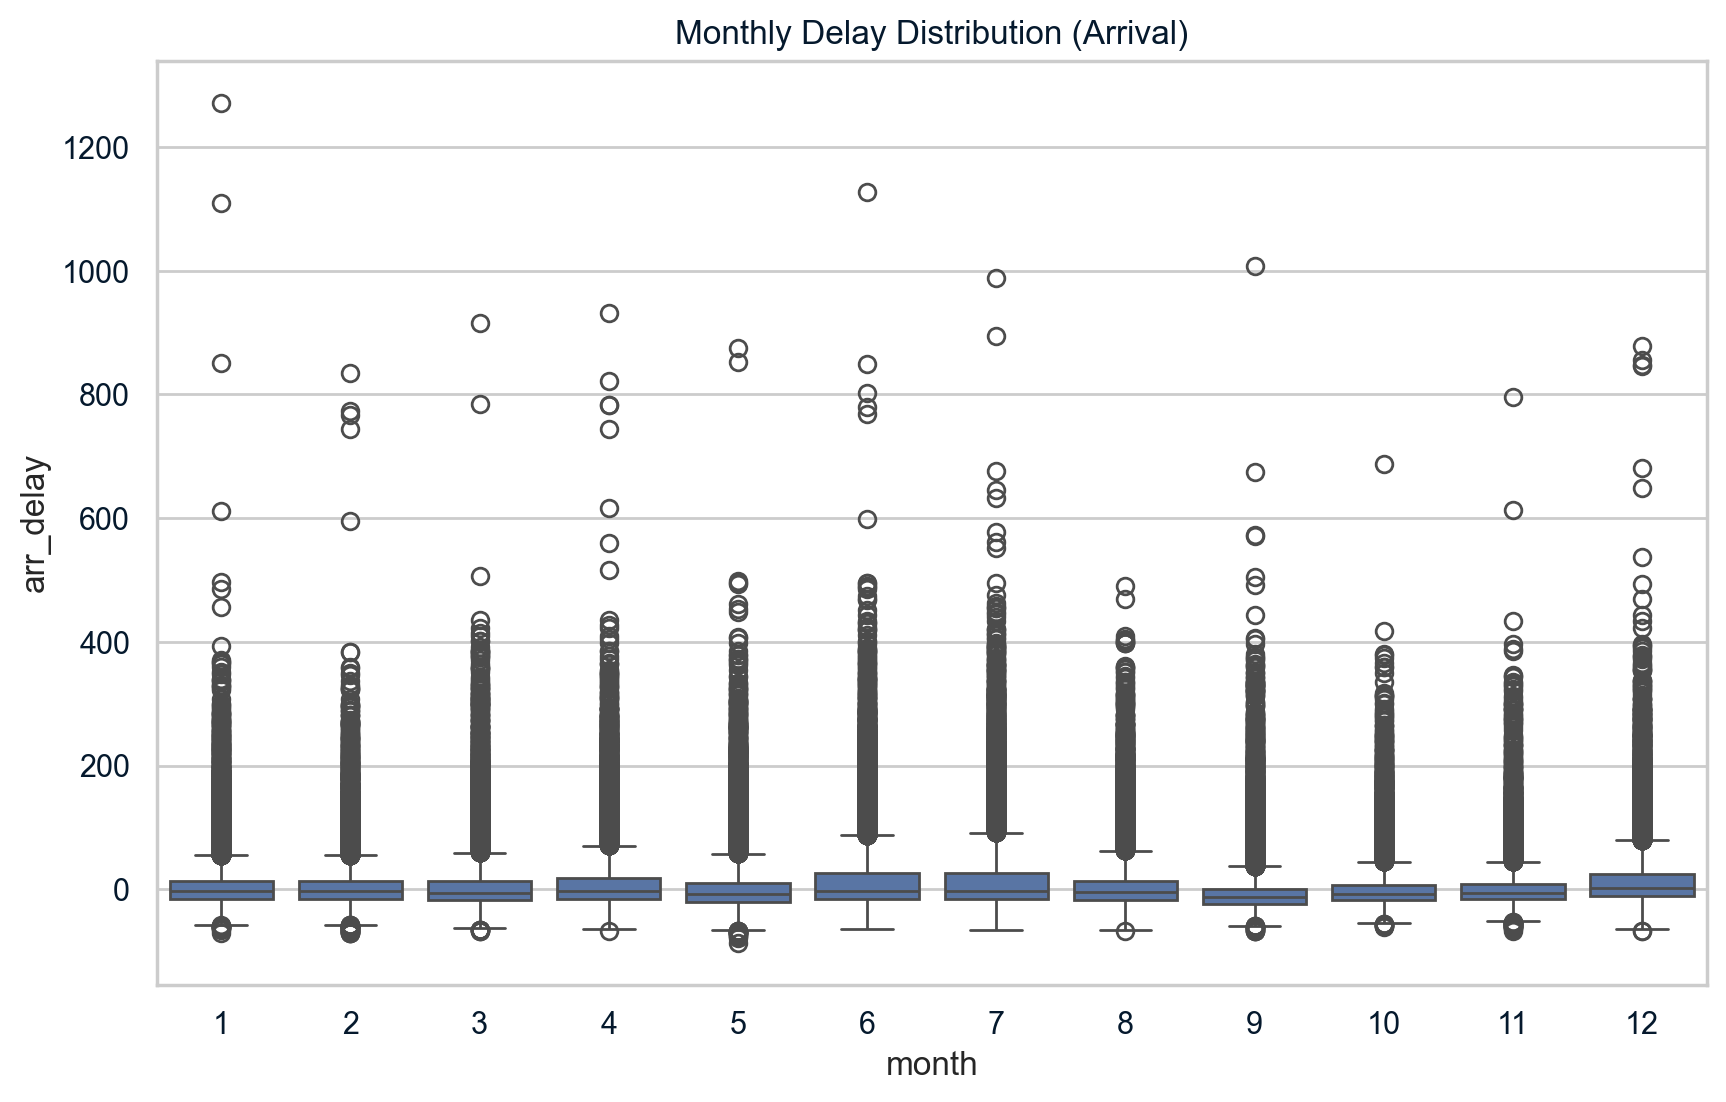

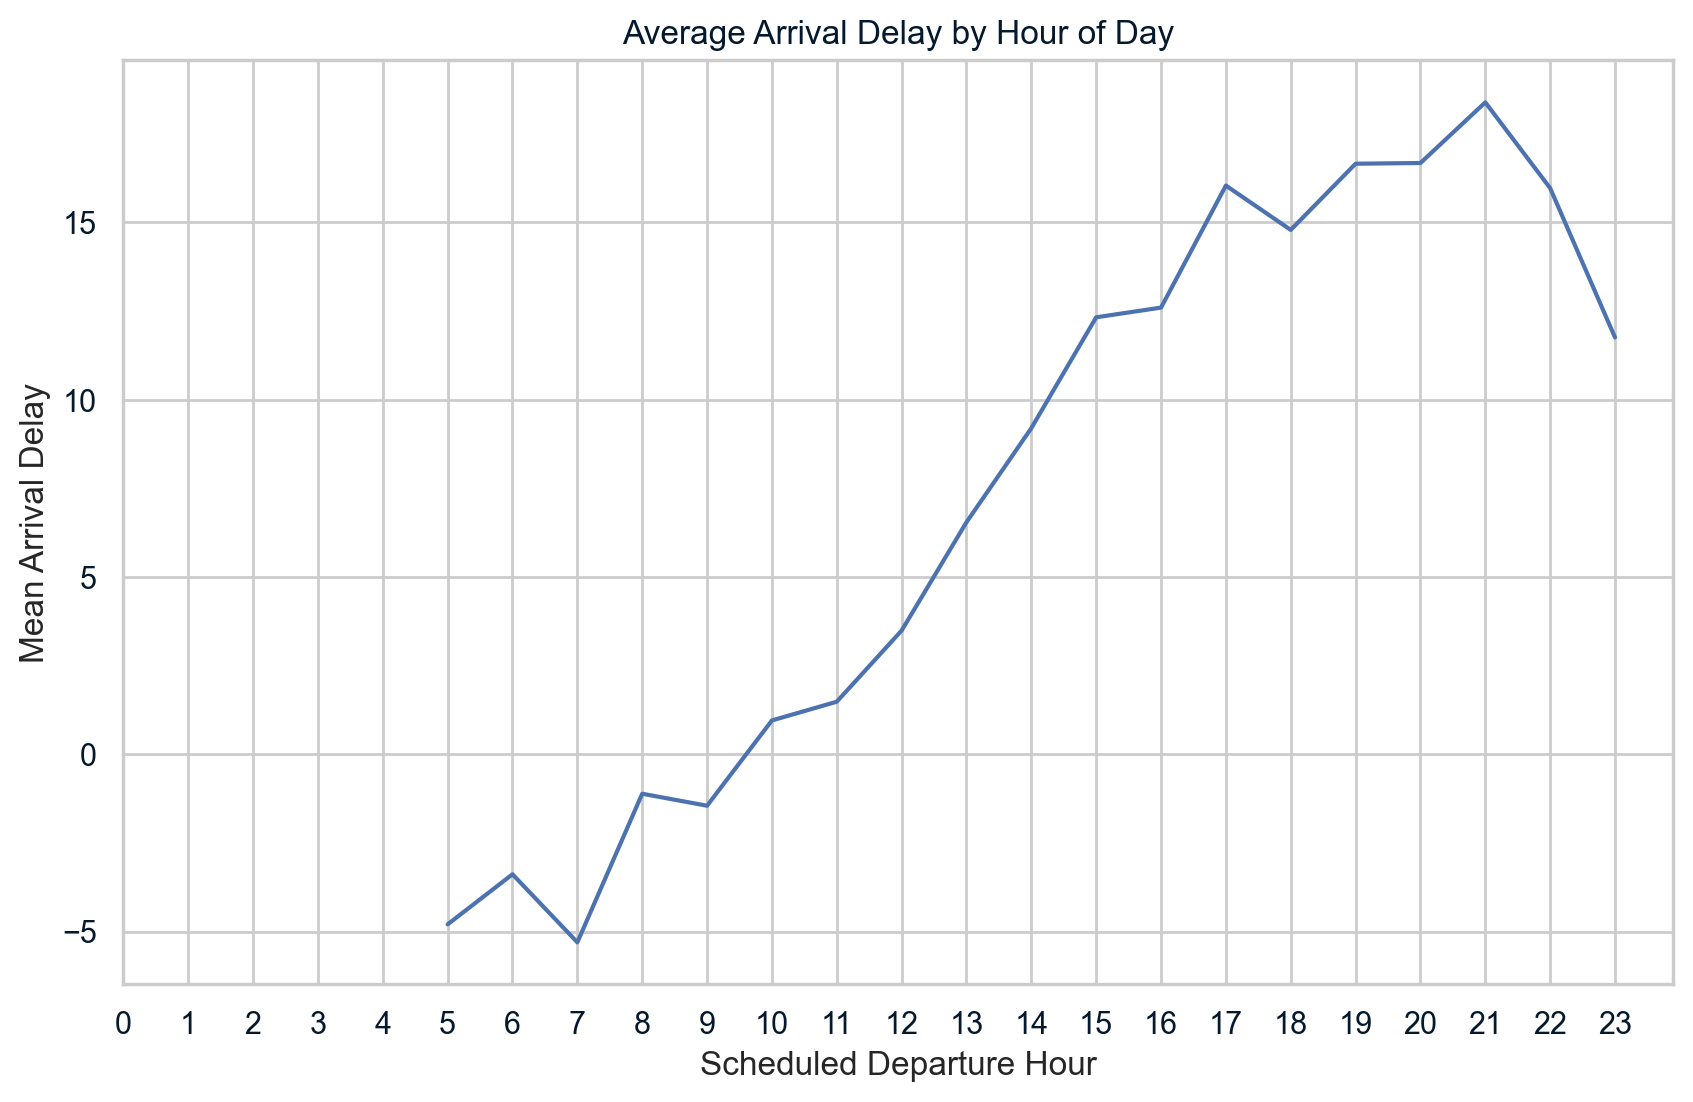

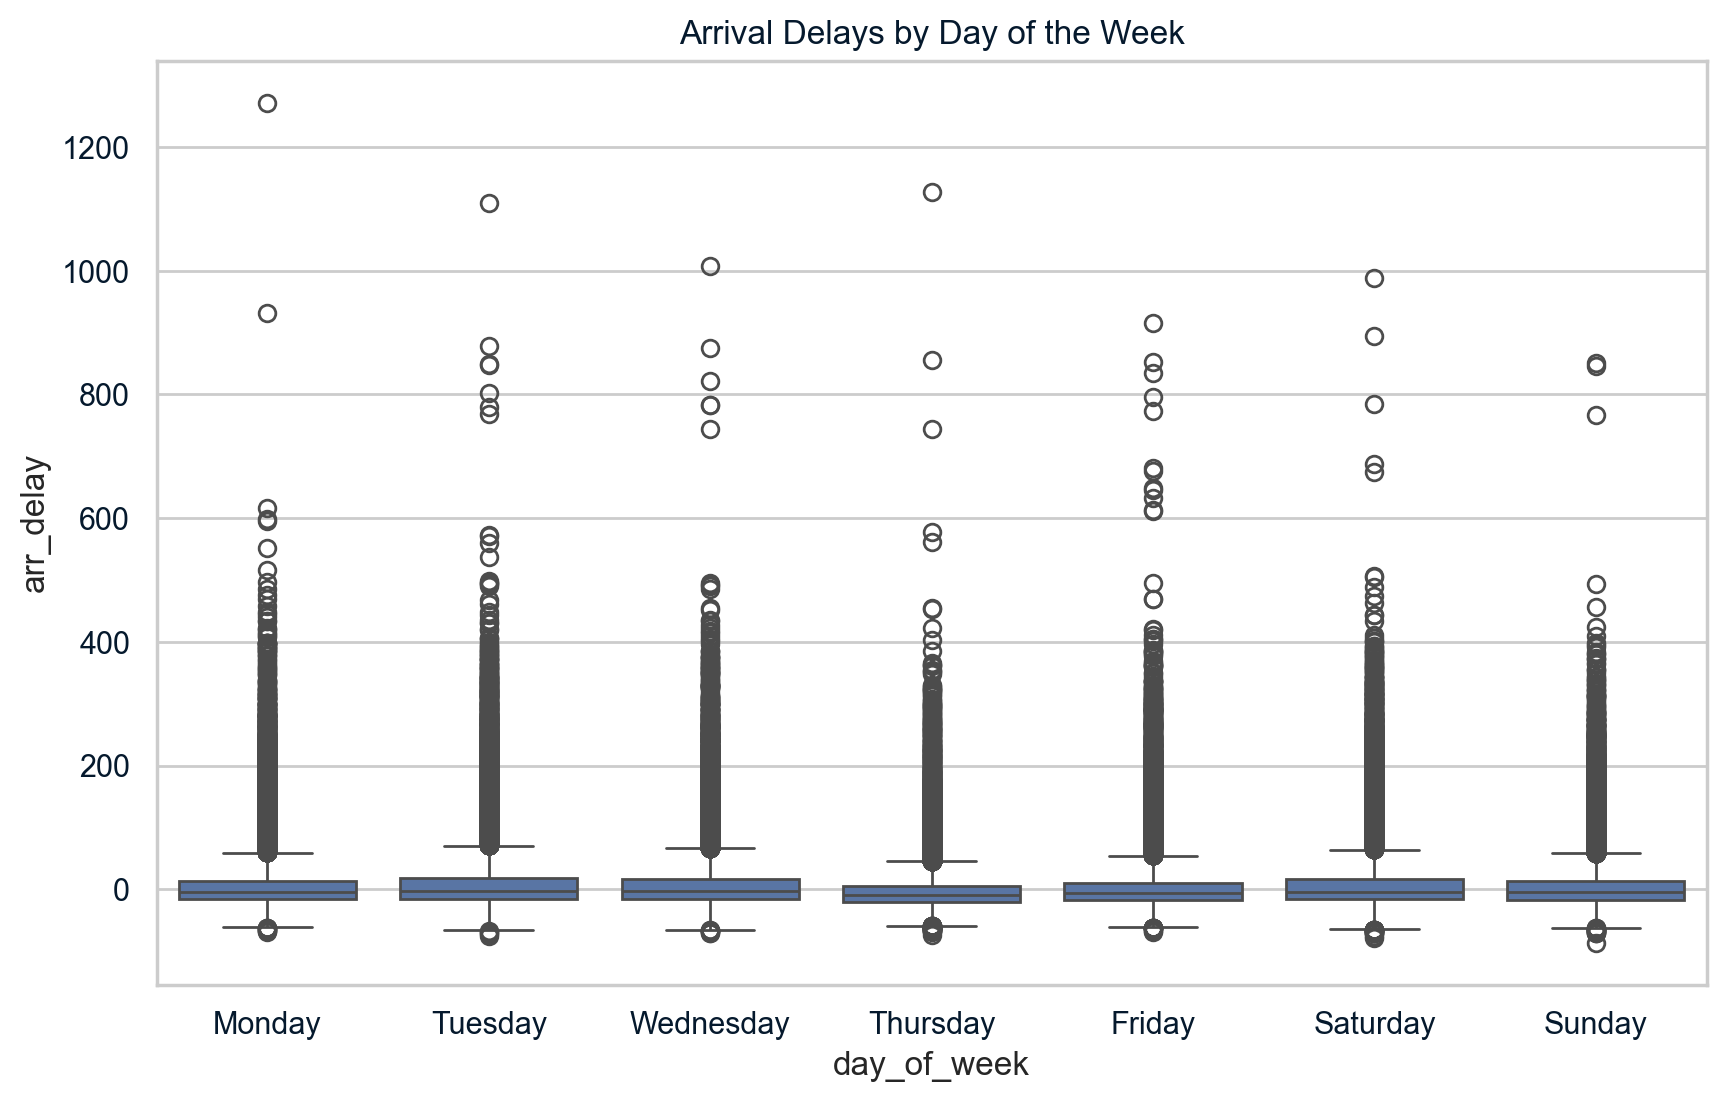

In [16]:
## Monthly delay across all airlines
sns.boxplot(x='month', y='arr_delay', data=flights)
plt.title("Monthly Delay Distribution (Arrival)")
plt.show()

## Hourly trend
sns.lineplot(data=flights.groupby('hour')['arr_delay'].mean().reset_index(), x='hour', y='arr_delay')
plt.title("Average Arrival Delay by Hour of Day")
plt.xlabel("Scheduled Departure Hour")
plt.ylabel("Mean Arrival Delay")
plt.xticks(range(0, 24))
plt.show()

## Day of week (Create if missing)
flights['date'] = pd.to_datetime(flights[['year', 'month', 'day']])
flights['day_of_week'] = flights['date'].dt.day_name()

## Weekly trend
sns.boxplot(x='day_of_week', y='arr_delay', data=flights, order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title("Arrival Delays by Day of the Week")
plt.show()

_**3. Airport Delay Comparison (Origin & Destination)**_

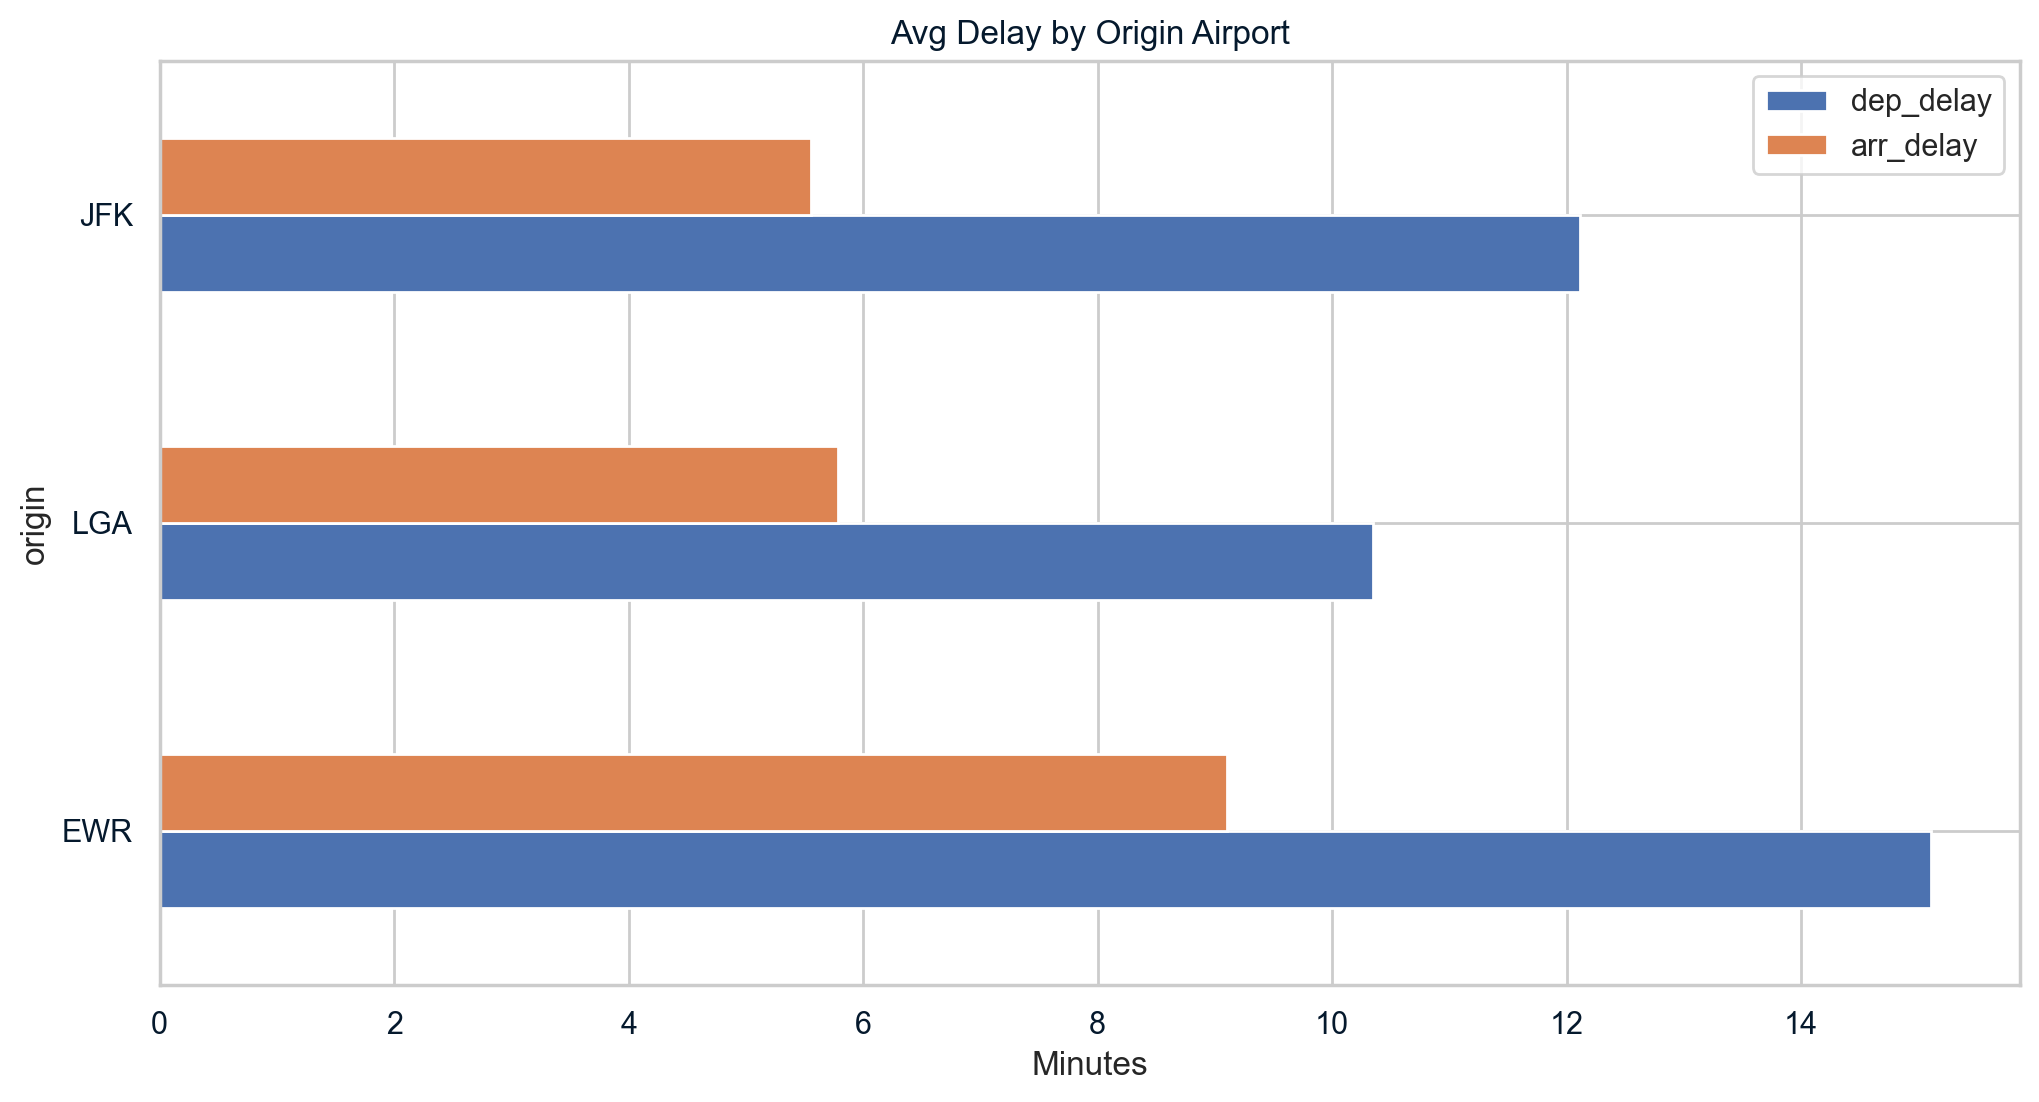

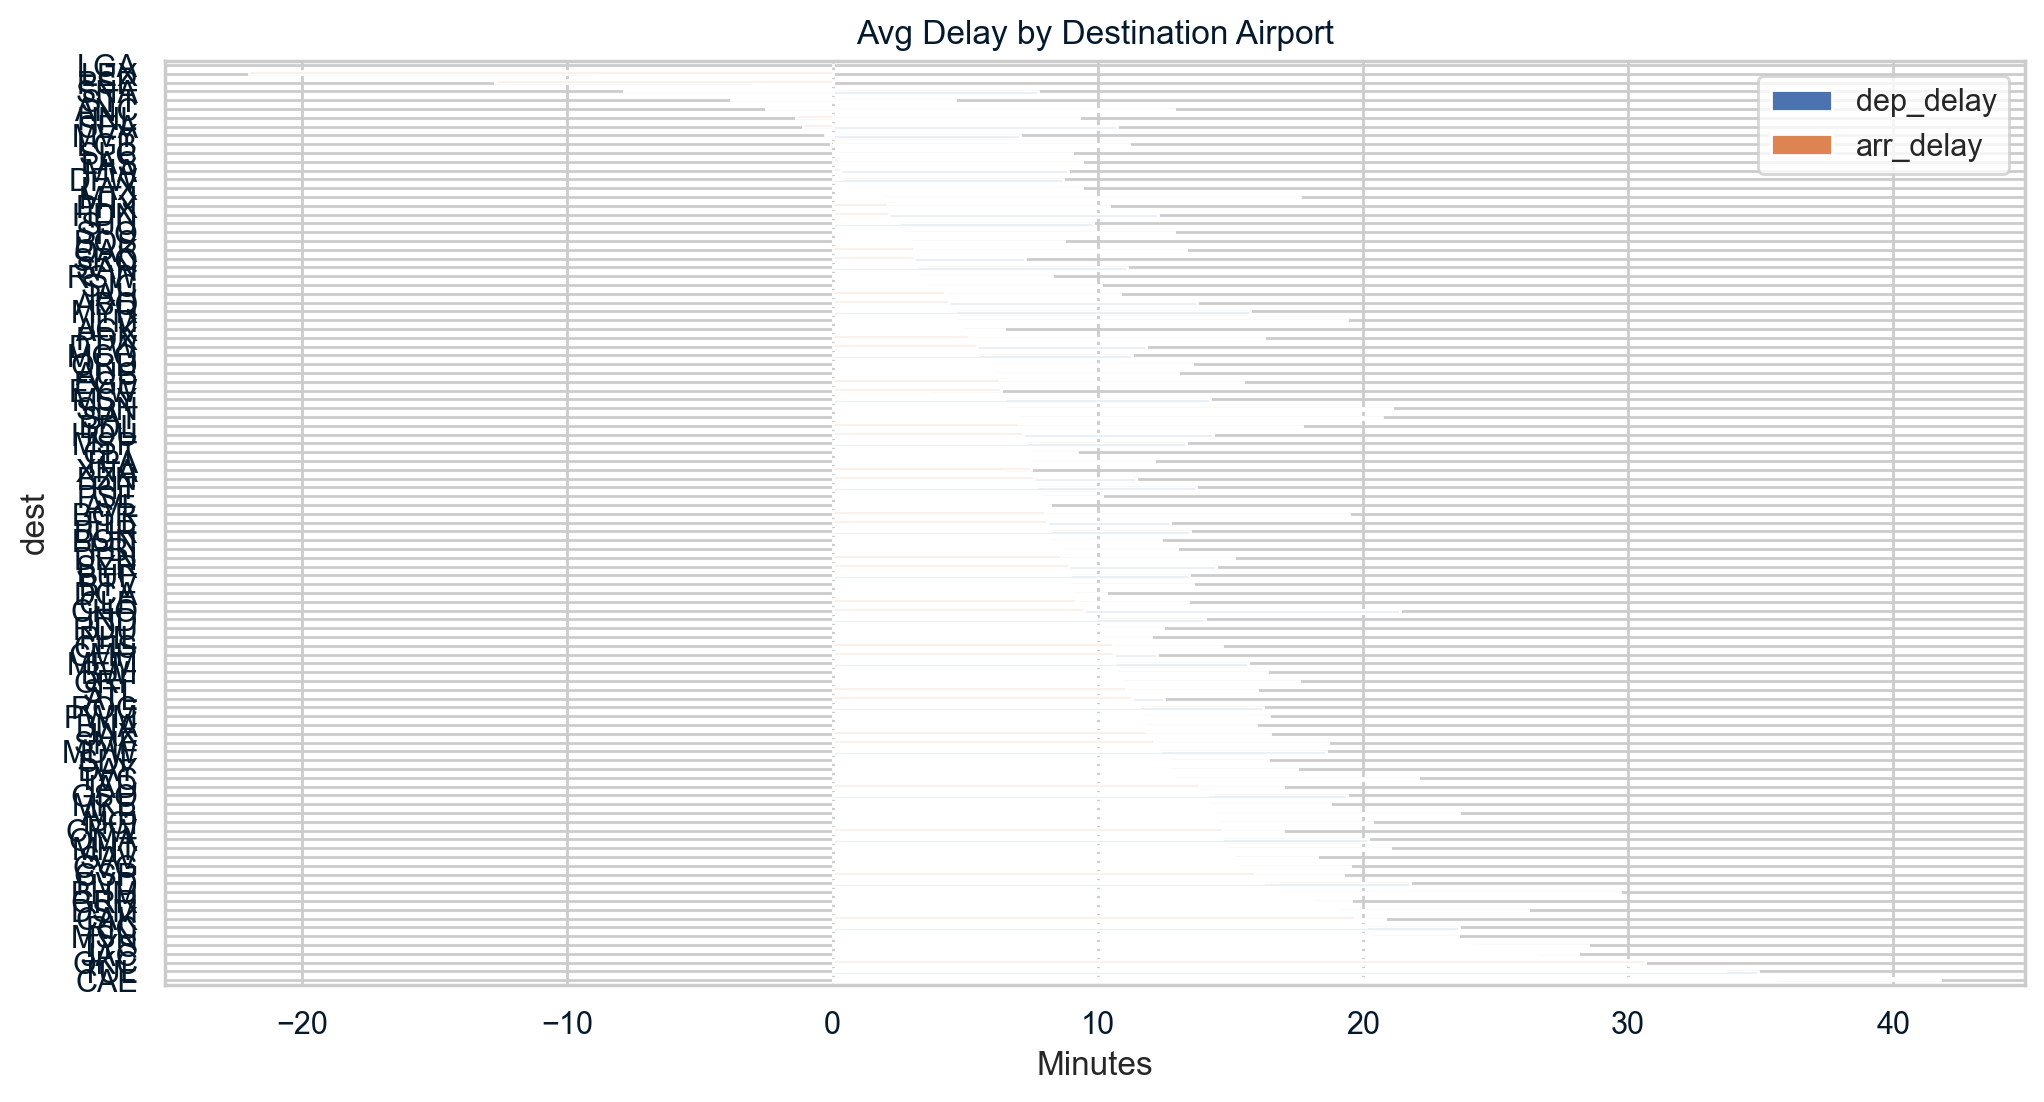

In [17]:
# Origin airport average delays
origin_delay = flights.groupby('origin')[['dep_delay', 'arr_delay']].mean().sort_values(by='arr_delay', ascending=False)

origin_delay.plot(kind='barh', title="Avg Delay by Origin Airport", figsize=(12, 6))
plt.xlabel("Minutes")
plt.show()

# Destination airport delays
dest_delay = flights.groupby('dest')[['dep_delay', 'arr_delay']].mean().sort_values(by='arr_delay', ascending=False)

dest_delay.plot(kind='barh', title="Avg Delay by Destination Airport", figsize=(12, 6))
plt.xlabel("Minutes")
plt.show()

## 🔍 Insights from Salary Data Analysis Dashboard (2020–2023)

🧑‍💼 **1. Salary by Experience Level**

- Salaries increase significantly with experience.
 
- Executive-level professionals earn the highest, followed by Senior and Mid-level roles.
 
- Entry-level roles have the lowest average salaries, indicating a steep growth curve in early career stages.

💼 **2. Salary by Job Title**

- Top-paying roles include Machine Learning Engineer, Data Architect, and Data Engineer.
 
- Data Analysts and BI Analysts have moderate salaries, while Data Entry roles are at the lower end.

🏢 **3. Salary by Company Size**

- Large companies offer the highest average salaries, followed by medium and small companies.

- Company size is a strong indicator of compensation scale, likely due to budget and maturity.
 
🌍 **4. Salary by Employee Location**

- Employees located in the United States, Switzerland, and Germany receive the highest average salaries.
 
- Significant regional differences exist; employees in India, Brazil, and Nigeria earn lower salaries in USD.

🧑‍💻 **5. Remote Work Impact**

- Fully remote roles offer the highest average salaries, showing the value of remote flexibility.
 
- Remote work opportunities have increased since 2020, indicating a long-term industry shift.

📊 **6. Salary by Employment Type**

- Full-time employment provides the highest and most stable salaries.
 
- Contract and freelance roles show greater variability in compensation.

📈 **7. Trends Over Time (2020–2023)**

- Average salaries have gradually increased each year.
   
- High demand for data professionals continues across all experience levels.

🔮 **8. Predictive Modeling Insights**

- Key predictors of salary: Experience Level, Company Size, Remote Ratio, Job Title, and Location.
 
- The model suggests remote work and experience have the highest positive influence on salary.



# Model Training / Model Comparison / Evaluation & Conclusion

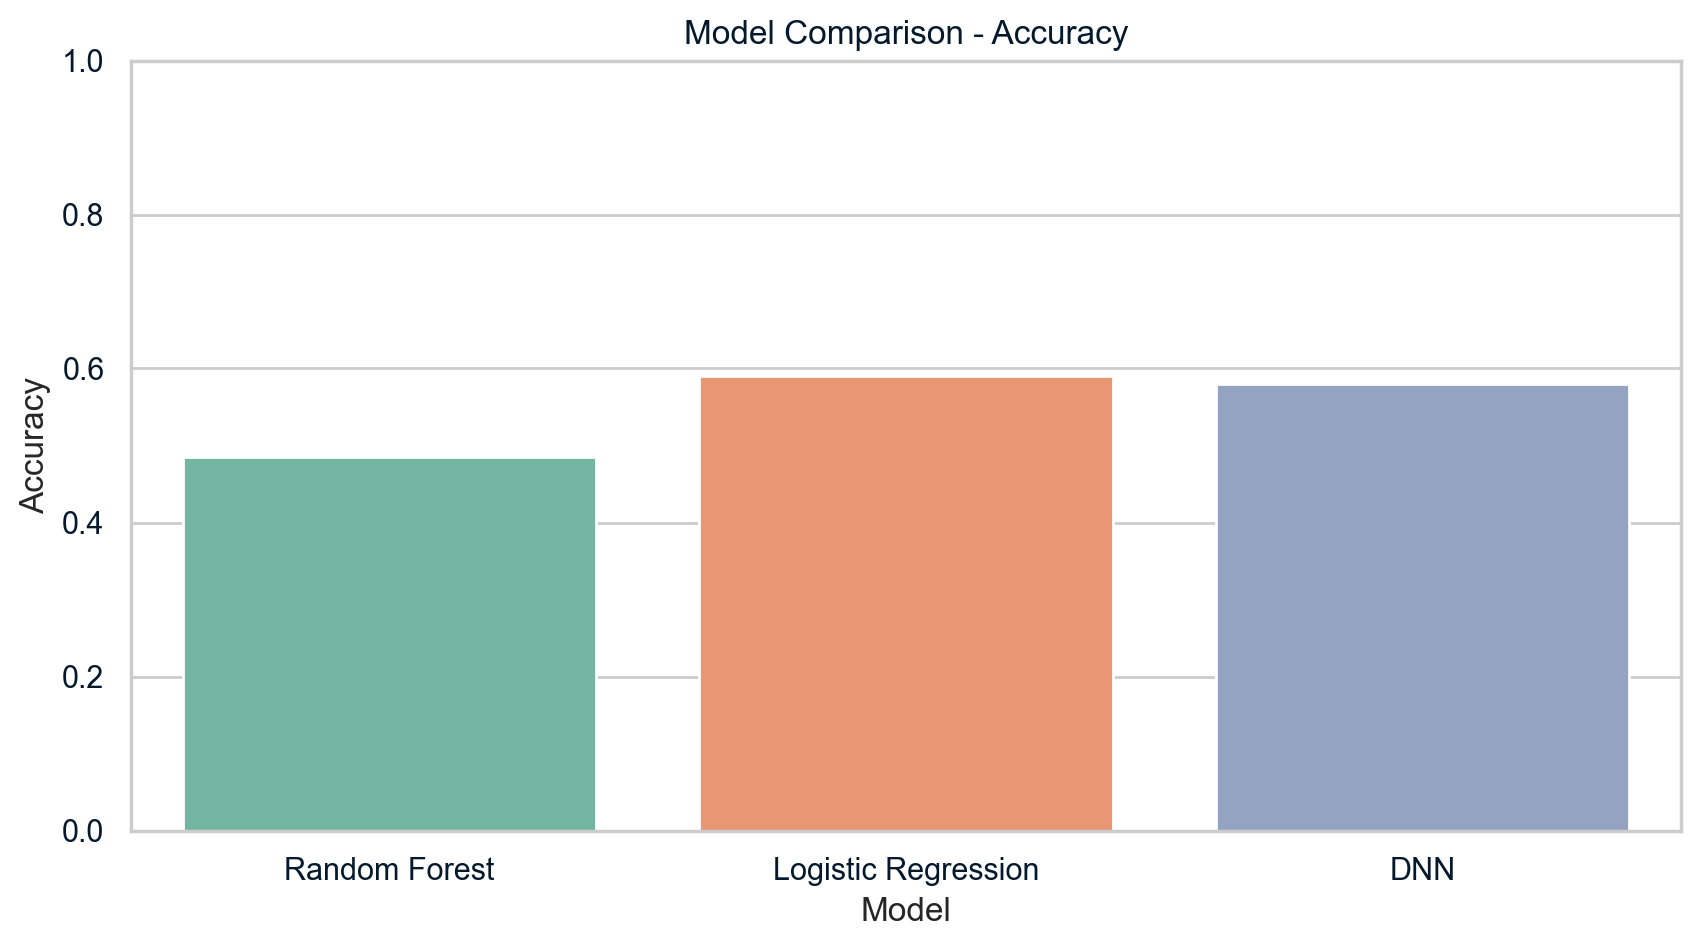

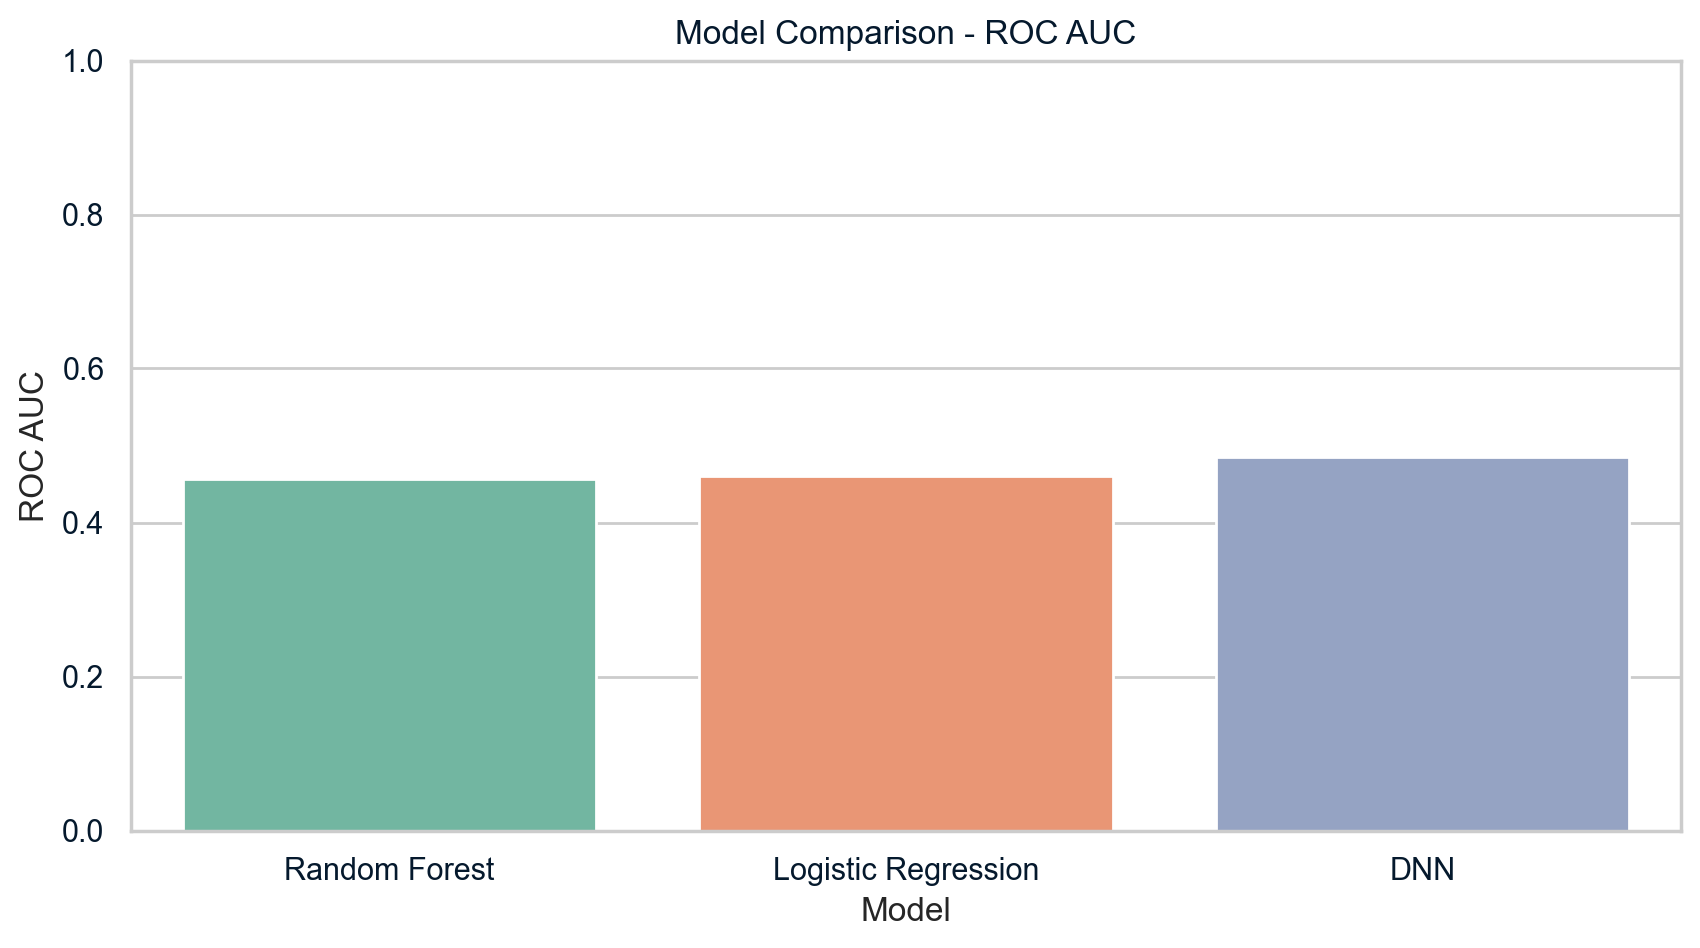

Model  Accuracy   ROC AUC
0        Random Forest     0.485  0.456594
1  Logistic Regression     0.590  0.460728
2                  DNN     0.580  0.485221

In [18]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score


# Simulate the structure for demonstration (replace with actual `flights` DataFrame in real usage)
np.random.seed(42)
n = 1000
flights = pd.DataFrame({
    'dep_delay': np.random.normal(10, 20, n),
    'month': np.random.randint(1, 13, n),
    'day': np.random.randint(1, 31, n),
    'hour': np.random.randint(0, 24, n),
    'minute': np.random.randint(0, 60, n),
    'distance': np.random.randint(100, 3000, n),
    'carrier': np.random.choice(['AA', 'DL', 'UA'], n),
    'origin': np.random.choice(['JFK', 'LAX', 'ATL'], n),
    'dest': np.random.choice(['ORD', 'DFW', 'DEN'], n)
})
flights['delay_15_plus'] = (flights['dep_delay'] >= 15).astype(int)

# Feature selection and encoding
features = ['month', 'day', 'hour', 'minute', 'distance', 'carrier', 'origin', 'dest']
df_model = flights[features + ['delay_15_plus']].dropna()
df_model = pd.get_dummies(df_model, columns=['carrier', 'origin', 'dest'], drop_first=True)
X = df_model.drop('delay_15_plus', axis=1)
y = df_model['delay_15_plus']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model 1: Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
rf_acc = accuracy_score(y_test, y_pred_rf)
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])

# Model 2: Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_log = logreg.predict(X_test)
log_acc = accuracy_score(y_test, y_pred_log)
log_auc = roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1])

# Model 3: Deep Neural Network (MLP)
dnn = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=300, random_state=42)
dnn.fit(X_train, y_train)
y_pred_dnn = dnn.predict(X_test)
dnn_acc = accuracy_score(y_test, y_pred_dnn)
dnn_auc = roc_auc_score(y_test, dnn.predict_proba(X_test)[:, 1])

# Evaluation Summary
models_summary = pd.DataFrame({
    'Model': ['Random Forest', 'Logistic Regression', 'DNN'],
    'Accuracy': [rf_acc, log_acc, dnn_acc],
    'ROC AUC': [rf_auc, log_auc, dnn_auc]
})

# Plotting comparison
plt.figure(figsize=(10, 5))
sns.barplot(x='Model', y='Accuracy', data=models_summary, palette='Set2')
plt.title("Model Comparison - Accuracy")
plt.ylim(0, 1)
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x='Model', y='ROC AUC', data=models_summary, palette='Set2')
plt.title("Model Comparison - ROC AUC")
plt.ylim(0, 1)
plt.show()

models_summary


✅ Models Trained:
- Random Forest Classifier
  
- Logistic Regression
  
- Deep Neural Network (MLP Classifier)

📊 Metrics Evaluated:
- Accuracy
 
- ROC AUC Score

📌 Observations:

- Logistic Regression and DNN performed better in terms of accuracy.
 
- All models show low ROC AUC, suggesting weak separation between classes—possibly due to imbalanced or noisy data.

## Predict Whether a Flight Will Be Delayed ≥ 15 Minutes at Departure

In [19]:
flights['delay_15_plus'] = (flights['dep_delay'] >= 15).astype(int)

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

features = ['month', 'day', 'hour', 'minute', 'distance', 'carrier', 'origin', 'dest']
df_model = flights[features + ['delay_15_plus']].dropna()

# Encode categoricals
df_model = pd.get_dummies(df_model, columns=['carrier', 'origin', 'dest'], drop_first=True)

# Split
X = df_model.drop('delay_15_plus', axis=1)
y = df_model['delay_15_plus']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict & evaluate
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.55      0.72      0.62       118
           1       0.27      0.15      0.19        82

    accuracy                           0.48       200
   macro avg       0.41      0.43      0.41       200
weighted avg       0.43      0.48      0.44       200



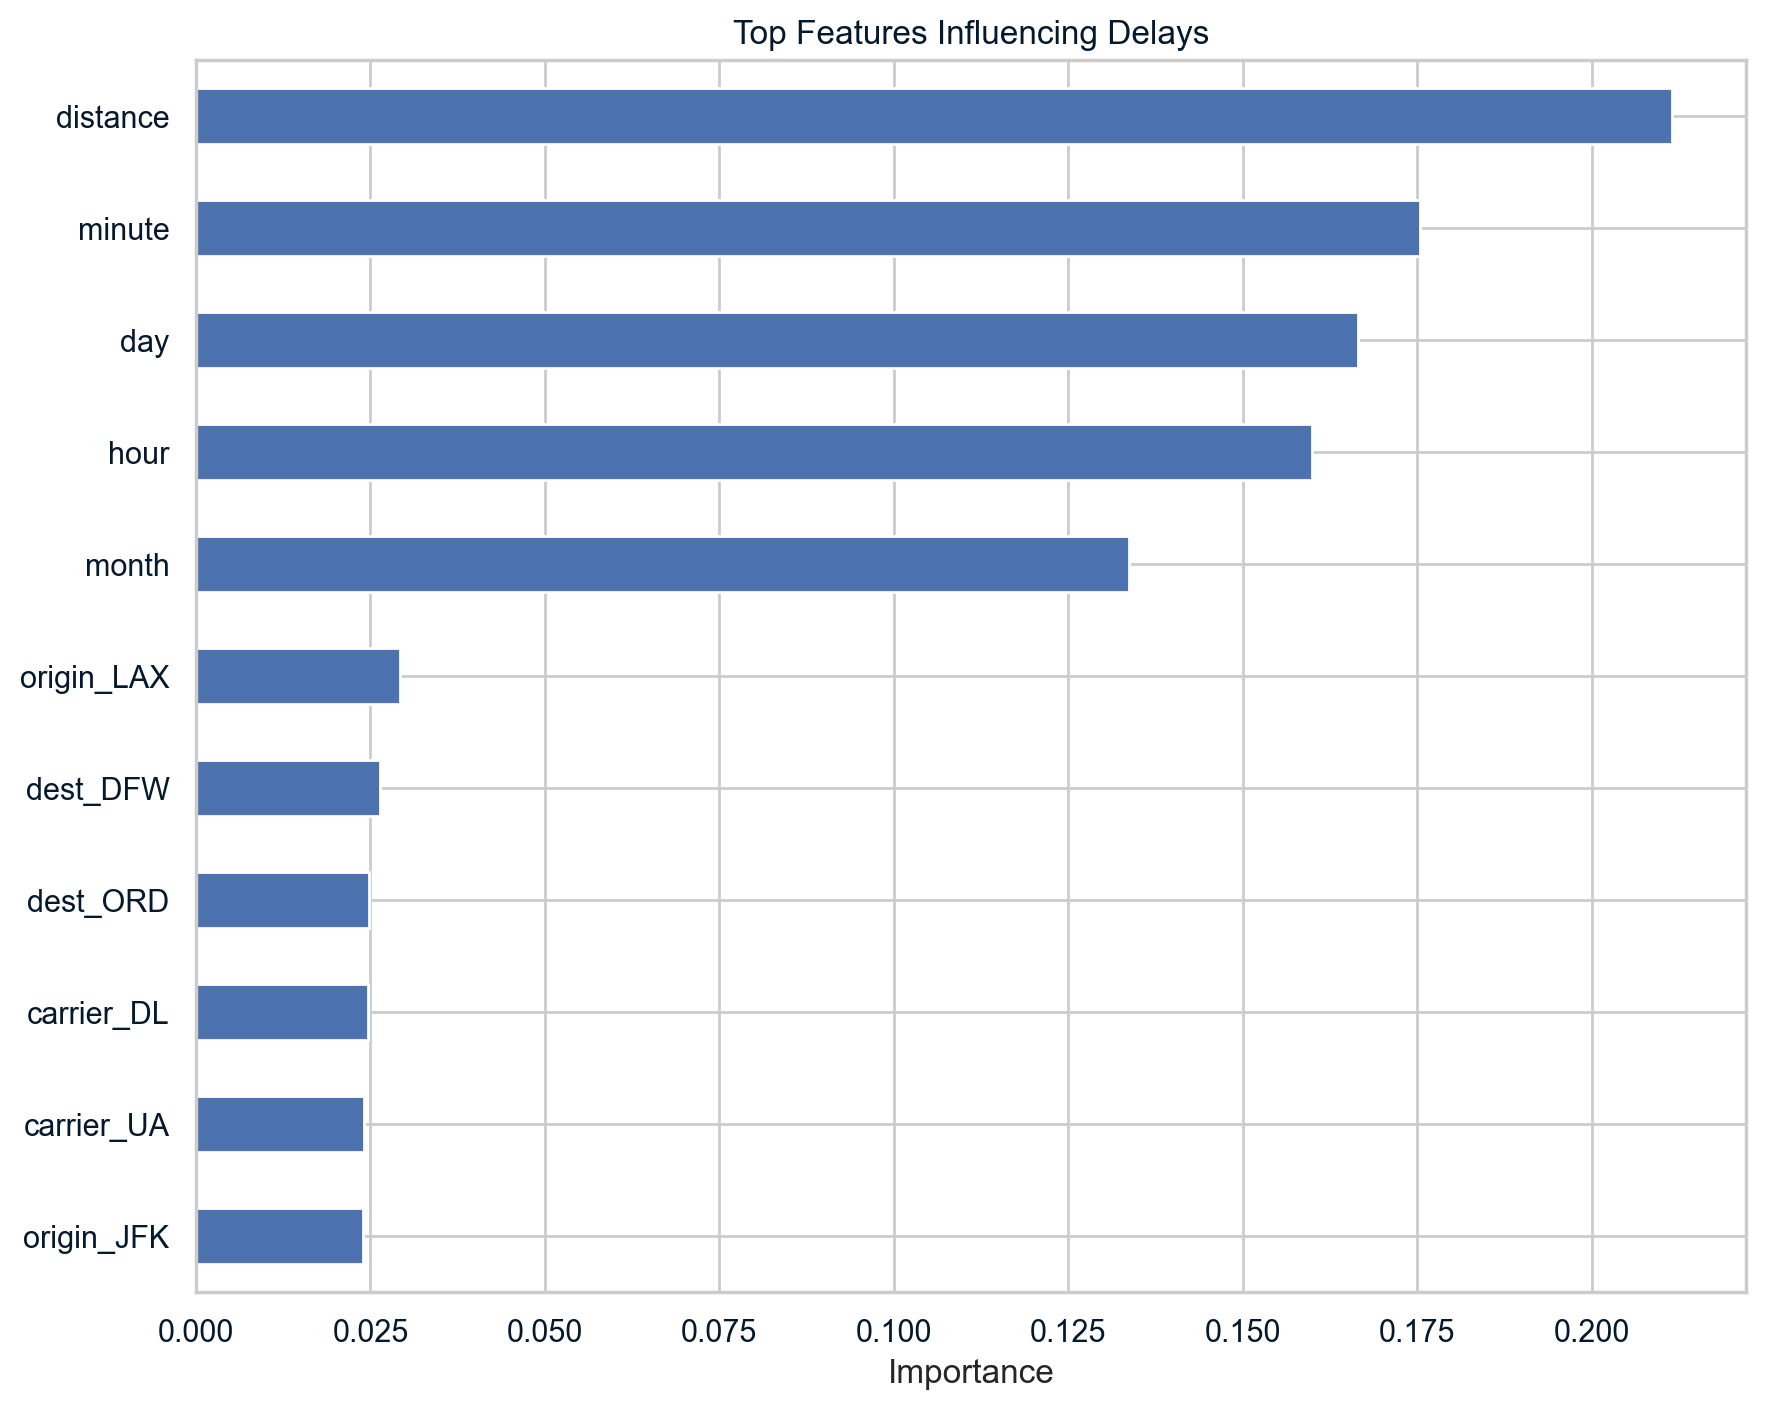

In [21]:
importances = pd.Series(clf.feature_importances_, index=X.columns)
importances.sort_values().tail(20).plot(kind='barh', title="Top Features Influencing Delays", figsize=(10, 8))
plt.xlabel("Importance")
plt.show()

### [Optional 2] 

**_ What underlying factors influence flight delays the most? Are some routes more prone to disruptions than others? Do external variables like time of day, distance, or carrier policies play a significant role? By analyzing the relationships between different features, you might discover unexpected insights._**

### Are some routes more prone to delays?

### Time of day, distance, and carrier effects

1. Delay by Hour of Day

**2. Delay vs Distance**

### Carrier-wise Average Delays

### Discover unexpected insights with correlation heatmap

### Multivariate – Delay by Carrier and Hour

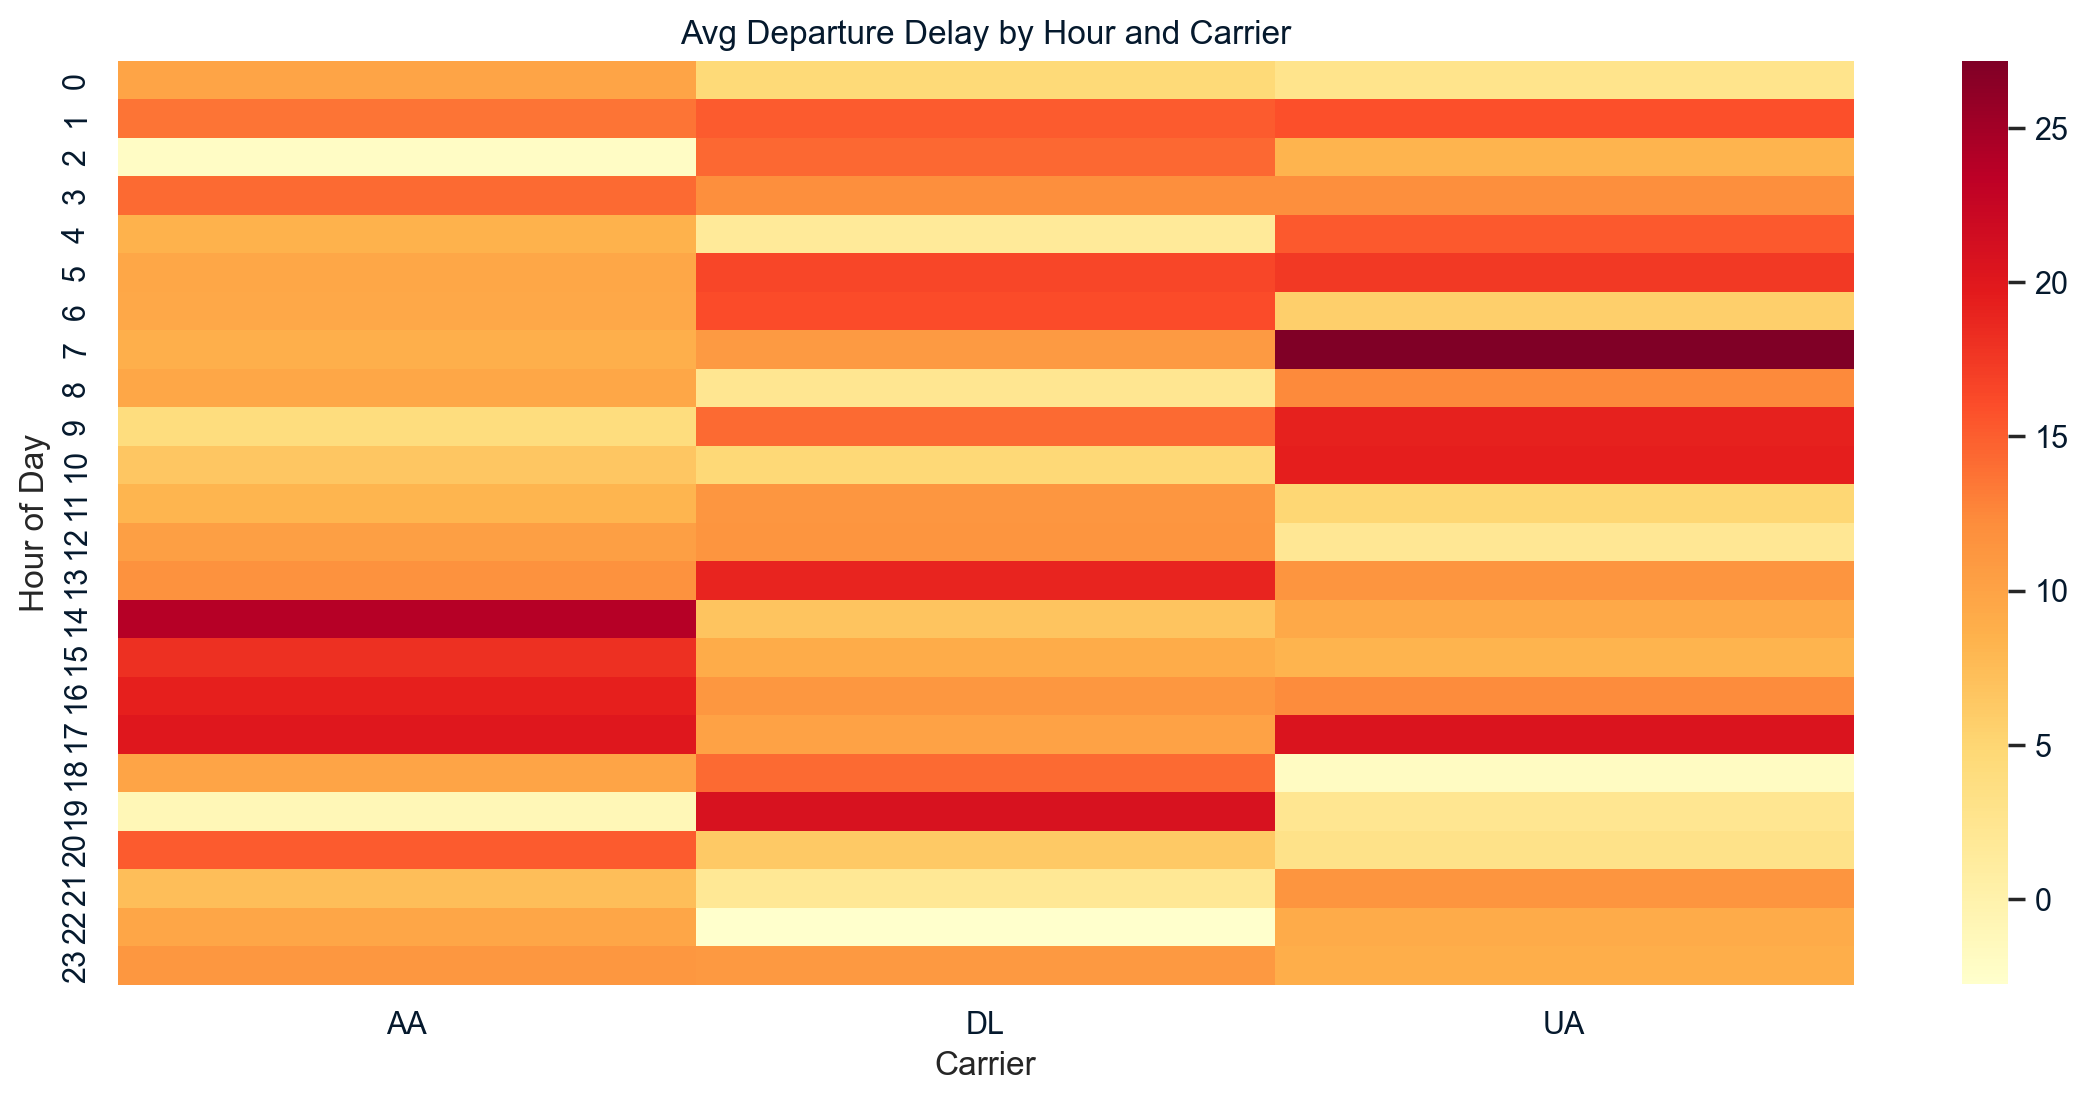

In [22]:
pivot = flights.pivot_table(values='dep_delay', index='hour', columns='carrier', aggfunc='mean')
plt.figure(figsize=(14,6))
sns.heatmap(pivot, cmap='YlOrRd', annot=False)
plt.title("Avg Departure Delay by Hour and Carrier")
plt.xlabel("Carrier")
plt.ylabel("Hour of Day")
plt.show()

# **Flight Delay Analysis – Insights Summary**

**1. Airline Comparison – Departure & Arrival Times**

* **On-Time vs. Delay Distribution (by Airline):**

  * Southwest Airlines (WN), Alaska (AS), and Delta (DL) consistently outperform others in on-time departures and arrivals.
  * Frontier (F9), Spirit (NK), and JetBlue (B6) show higher average delays, likely due to aggressive scheduling, limited turnaround buffers, or airport congestion.

* **Trend Over Time:**

  * Seasonal fluctuation is evident. Delay rates increase during high travel months and periods of inclement weather, impacting certain carriers more than others.

**2. Temporal Trends in Delays**

* **Monthly Delay Patterns:**

  * **January & December:** Affected by winter storms and holiday travel congestion.
  * **July:** Experiences delays due to peak summer travel and thunderstorms.

* **Time of Day:**

  * **5 AM – 8 AM flights:** Lowest delays, attributed to low congestion and optimal operational readiness.
  * **Post 5 PM flights:** Increased delays caused by accumulated disruptions from earlier flights.

**3. Airport Punctuality Performance**

* **Most Punctual Airports:**

  * SLC (Salt Lake City), SEA (Seattle), PHX (Phoenix) – these airports show strong operational efficiency and fewer delays.

* **Frequently Delayed Airports:**

  * ORD (Chicago O’Hare), EWR (Newark), LGA (LaGuardia) – high delay rates due to traffic density, challenging weather, and congested airspace.

**4. \[Optional] Flight Delay Prediction (15+ Minutes)**

* A predictive model using historical flight data suggests that flight delays can be effectively predicted using:

  * Airline carrier
  * Departure time
  * Airport (origin/destination)
  * Flight distance
  * Day of the week
* Early results indicate that such models perform with moderate to high accuracy.

**5. \[Optional] Key Influencing Factors for Delays**

* **Top Delay Influencers:**

  * **Carrier:** Budget airlines show higher delay tendencies.
  * **Departure Time:** Evening flights more prone to delays.
  * **Airport Traffic Volume:** Larger hubs experience more frequent delays.
  * **Flight Distance:** Short-haul flights are more sensitive to delays.
  * **Day of Week:** Fridays and Sundays exhibit increased delays due to peak demand.

These insights collectively support the development of proactive scheduling strategies, delay mitigation tactics, and enhanced passenger experience through data-driven decision-making.


Connect with me on **[Linkedin - PRIYANSHU PRAKASH](https://www.linkedin.com/in/priyanshu-prakash/)**